# Summary

<p>
This notebook explores the city of Nashville using geospatial or geographic data.
</p>   
<p>
A version of the notebook is avaible with<br>
<a href="https://nbviewer.jupyter.org/github/RolfChung/geospatial_data_1/blob/main/geospatialData_1_Nashville_345.ipynb" target="_blank">nbviewer</a><br>
Other than Github this shows folium plots.
<p>
   
"Geographic data and information is defined in the ISO/TC 211 series of standards as data and information having an implicit or explicit association with a location relative to Earth (a geographic location or geographic position)."<br>
<a href="https://en.wikipedia.org/wiki/Geographic_data_and_information" target="_blank">Wikipedia</a> 
</p>

<p>
Here this means in practical terms 'longitudes' and 'latitudes' are used. Two coordinate reference systems are mainly applied here: EPSG:4326 and EPSG:3857.
</p>
<p>
"A spatial reference system (SRS) or coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities. A SRS commonly defines a specific map projection, as well as transformations between different SRS."<br>
<a href="https://en.wikipedia.org/wiki/Spatial_reference_system" target="_blank">Wikipedia</a>  
<br>
It is of overall important to apply the right crs for the operation in case.<br>
Otherwise major trouble is ahead.<br>
More on this in the notebook.
</p> 

<p>
    In a Python perspective the <b>Geopandas</b> package is applied here.
</p> 

<p>
"GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting."<br>
<a href="https://geopandas.readthedocs.io/en/latest/index.html" target="_blank">GeoPandas</a>  
</p> 

<p>
I am totally agreeing  with this. In general it makes life easier and is an entry point into the
many geopspatial packages and dependencies behind it.
</p>

<p>
Further topics explored here are:
</p>

<ul>
  <li>Shapefiles</li>
  <li>GeoDataFrames</li>
  <li>GeoJson</li>
  <li>Geospatial Joins</li>
  <li>Geopspatial calculations</li>
  <li>Geopandas plots</li>
  <li>Folium plots</li>
  <li>Choropleth plots</li>
</ul> 

# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as geop
import json, requests
from shapely.geometry import Point
import pprint
import sys
import folium

%matplotlib inline


In [2]:
print("Version Pandas: {}".format(pd.__version__))
print("Version Geopandas: {}".format(geop.__version__))
print("Version Numpy: {}".format(np.__version__))

Version Pandas: 1.2.4
Version Geopandas: 0.8.1
Version Numpy: 1.19.2


Did the import work?

In [3]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'numpy',
 'pandas',
 'matplotlib.pyplot',
 'seaborn',
 'os',
 'geopandas',
 'json',
 'requests',
 'pprint',
 'sys',
 'folium',
 'types']

In [4]:
# Seaborn | Style And Color: ttps://www.geeksforgeeks.org/seaborn-style-and-color/
sns.set() 
sns.set_style("whitegrid") 
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})
sns.axes_style("whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [5]:
currentwd = os.getcwd()
# print(currentwd)

## Shapefiles of Nashville

<p>
"The shapefile format is a geospatial vector data format for geographic information system (GIS) software. ... The shapefile format can spatially describe vector features: points, lines, and polygons, representing, for example, water wells, rivers, and lakes. Each item usually has attributes that describe it, such as name or temperature."<br>
<a href="https://en.wikipedia.org/wiki/Shapefilem" target="_blank">Wikipedia</a> 
</p> 



<p>
Shapefiles of Nashville are here used with <b>GeoPandas 0.9.0</b>.
</p>

<p>
The Nashville geospatial data is available on 
<a href="https://data.nashville.gov/General-Government/Service-Districts-GIS-/xxxs-vvs4" target="_blank">data.nashville.gov</a> <br>
According to description: <br>
Geographic boundaries of the Urban Services District and General Services District of Nashville and Davidson County.
</p> 

<p>
Nashville has got two overarching districts: the Urban Services District and the	General Services District.<br> 	
Within the two general districts are a lot of sub districts stored here in "neighborhoods.geojson".<br>
</p> 

In [6]:
nv = geop.read_file('datasets/neighborhoods.geojson', encoding='utf-8')

In [7]:
print(type(nv))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [8]:
print(nv.dtypes)

name          object
geometry    geometry
dtype: object


In [9]:
print(nv.shape)

(288, 2)


In [10]:
print(nv.columns)

Index(['name', 'geometry'], dtype='object')


In [11]:
print(nv.index)

RangeIndex(start=0, stop=288, step=1)


In [12]:
nv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      288 non-null    object  
 1   geometry  288 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.6+ KB


In [13]:
nv.head()

name                                           geometry
0  Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1        Charlotte Park  MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ...
2              Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3            West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4          White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...

In [14]:
nv.tail()

name                                           geometry
283  River Plantation III  MULTIPOLYGON (((-86.94600 36.06871, -86.94605 ...
284        Porter Heights  MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ...
285         Avondale Park  MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ...
286          Travis Trace  MULTIPOLYGON (((-87.01880 36.08394, -87.01866 ...
287         Oak Highlands  MULTIPOLYGON (((-86.67565 36.03451, -86.67555 ...

#### Coordinate Reference Systems
<p>
"The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth."<br>
<a href="https://geopandas.org/docs/user_guide/projections.html" target="_blank">geopandas</a> 
</p> 


In [15]:
nv.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Shapes of some NV service districts

Historic Buena Vista


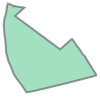

In [16]:
print(nv.name[0])
nv.loc[0, 'geometry']

Charlotte Park


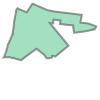

In [17]:
print(nv.name[1])
nv.loc[1, 'geometry']

Ransom Place


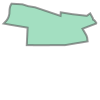

In [18]:
print(nv.name[144])
nv.loc[144, 'geometry']

### Shape of Nashville service districts

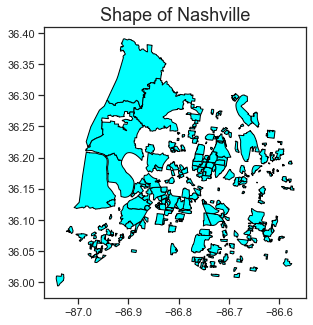

In [19]:
nv.plot(edgecolor='black', linewidth=1, color='cyan', figsize=(15,5))
plt.title('Shape of Nashville', fontsize=18)
plt.show()

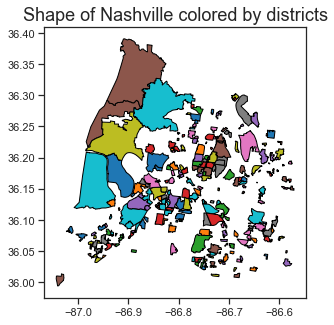

In [20]:
nv.plot(edgecolor='black', linewidth=1, column='name', legend=False, figsize=(15,5))
plt.title('Shape of Nashville colored by districts', fontsize=18)
plt.show()

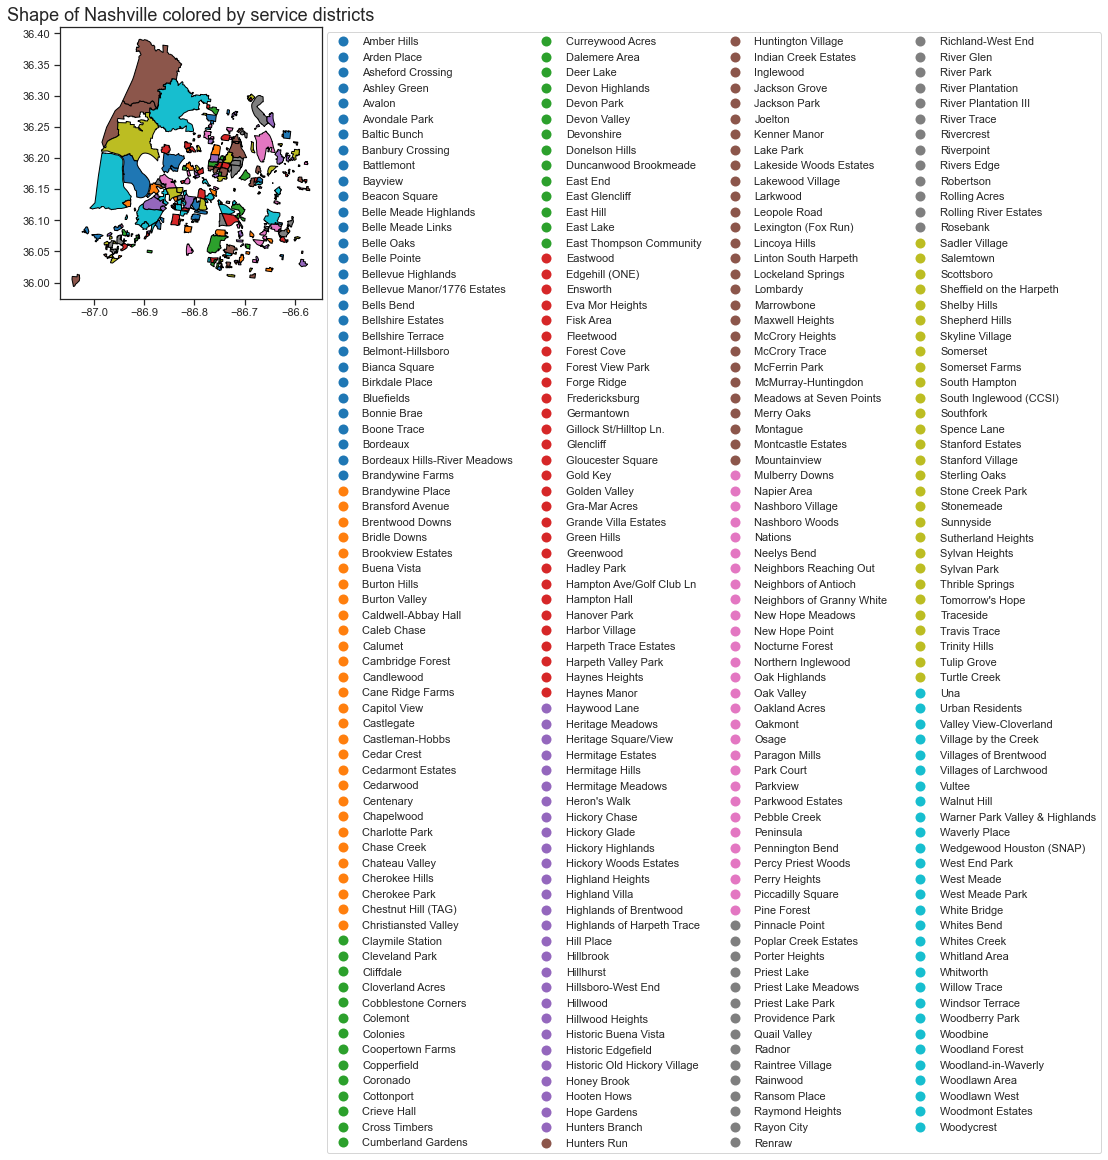

In [21]:
nv.plot(edgecolor='black', linewidth=1, column='name', legend=True,
        legend_kwds={'bbox_to_anchor':(1,1), 'ncol':4, 'loc':'upper left'},
        figsize=(15,5))
plt.title('Shape of Nashville colored by service districts', fontsize=18)
plt.show()

### Shape of Nashville overarching service districts

In [22]:
nv_shape = geop.read_file('datasets/Nash_shape/geo_export_586b6f7f-f69c-426a-be97-7cc49f2b415b.shp')

In [23]:
print(type(nv_shape))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [24]:
print(nv_shape.dtypes)

area_sq_mi     float64
name            object
objectid       float64
geometry      geometry
dtype: object


In [25]:
nv_shape.shape

(2, 4)

In [26]:
nv_shape.columns

Index(['area_sq_mi', 'name', 'objectid', 'geometry'], dtype='object')

In [27]:
nv_shape.index

RangeIndex(start=0, stop=2, step=1)

In [28]:
nv_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   area_sq_mi  2 non-null      float64 
 1   name        2 non-null      object  
 2   objectid    2 non-null      float64 
 3   geometry    2 non-null      geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 192.0+ bytes


In [29]:
nv_shape

area_sq_mi                       name  objectid  \
0       198.0    Urban Services District       0.0   
1       327.0  General Services District       4.0   

                                            geometry  
0  POLYGON ((-86.68681 36.28671, -86.68706 36.285...  
1  MULTIPOLYGON (((-86.56776 36.03424, -86.56783 ...

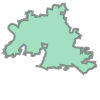

In [30]:
USD_shape = nv_shape.loc[0, 'geometry']
USD_shape

In [31]:
# for i in pd.Series(nv_shape.iloc[0,3]):
    # print(i)

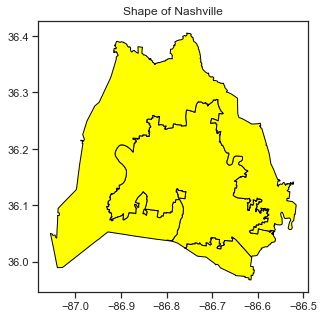

In [32]:
nv_shape.plot(edgecolor='black', color='yellow', figsize=(12,5))
plt.title('Shape of Nashville')
plt.show()

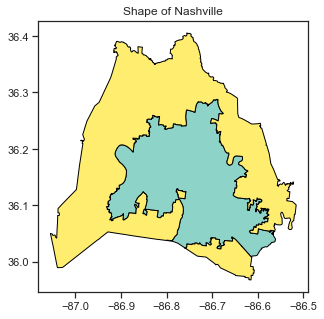

In [33]:
nv_shape.plot(edgecolor='black', cmap='Set3', figsize=(12,5))
plt.title('Shape of Nashville')
plt.show()

#### Generating the outer boundaries of Nashville at a whole from given geometries

<strong>with GeoSeries.unary_union</strong>

<p>
Return a geometry containing the union of all geometries in the GeoSeries.
</p>


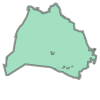

In [34]:
nv_shape_unary = nv_shape.unary_union
nv_shape_unary

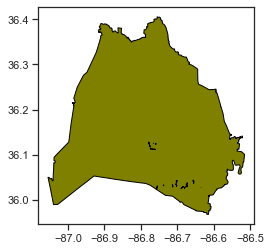

In [35]:
nv_shape_unary_gdf =  geop.GeoDataFrame(geometry=[nv_shape_unary], crs=nv_shape.crs)
nv_shape_unary_gdf.plot(edgecolor='black', color='olive')
plt.show()

### Working with attribute methods of Geoseries geometry data
<p>
starting by:<br> 
</p> 

#### Calculating the areas of NV

In [36]:
nv_shape.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
area_usd = nv_shape.geometry[0].area
print("Area of {name}: {area}".format(name= nv_shape.loc[0, 'name'], area= area_usd))

Area of Urban Services District: 0.05129179340041279


In [38]:
area_gsd = nv_shape.geometry[1].area
print("Area of {name}: {area}".format(name= nv_shape.loc[1, 'name'], area= area_gsd))

Area of General Services District: 0.08497145137184457


<p>
Above the areas are calculated in decimal places according to the EPSG: 4326 crs.<br>
This is not human friendly.<br>
A better understanding is enabled by calculating m^2 and km^2.<br>
This only works only for small distances.<br>
Otherwise you have to correct for the fact that the
earth is a sphere and not a disc ;-)<br>
More on <a href="https://gis.stackexchange.com/questions/242545/how-can-epsg3857-be-in-meters" target="_blank">'How can EPSG:3857 be in meters?'</a> here.
</p>

<p>
Using epsg=3857 for meters as a csr returns m^2.
</p> 

<p>
<b>Convert m squared to km squared:</b><br>
"How many m squared in 1 km squared? The answer is 1.000.000.
We assume you are converting between square metre and square kilometre.
You can view more details on each measurement unit:
m squared or km squared
The SI derived unit for area is the square meter.
1 square meter is equal to 1.0E-6 km squared."<br>
<a href="https://www.convertunits.com/from/m+squared/to/km+squared" target="_blank">convertunits.com</a> 
</p> 


In [39]:
nv_areas_m = nv_shape.geometry.to_crs(epsg=3857).area
nv_areas_m

0    7.870586e+08
1    1.304650e+09
dtype: float64

In [40]:
conversion_m_km = 1000000
nv_areas_m / conversion_m_km

0     787.058567
1    1304.650479
dtype: float64

In [41]:
round(nv_areas_m / (10**6), 2)

0     787.06
1    1304.65
dtype: float64

Km 2 to miles 2.

In [42]:
conversion_miles = 0.3861

nv_area_km2 = pd.Series(list(nv_areas_m / (10**6))).round(2)
print(nv_area_km2)
nv_area_miles2 = pd.Series(list(np.array(nv_area_km2) *0.3861)).round(2)
print(nv_area_miles2)

0     787.06
1    1304.65
dtype: float64
0    303.88
1    503.73
dtype: float64


In [43]:
nv_areas_df = pd.DataFrame(zip(nv_area_km2, nv_area_miles2), columns=('km2', 'miles2'),
                           index=['UrbanSD', 'GeneralSD'])
nv_areas_df

km2  miles2
UrbanSD     787.06  303.88
GeneralSD  1304.65  503.73

In [44]:
nv_areas_sums = nv_areas_df.apply(sum, axis=0)
nv_areas_sums_series = \
pd.Series(data={'km2':nv_areas_sums[0], 'miles2':nv_areas_sums[1]}, name="Total_areas")

In [45]:
nv_areas_df.append(nv_areas_sums_series, ignore_index=False)

km2  miles2
UrbanSD       787.06  303.88
GeneralSD    1304.65  503.73
Total_areas  2091.71  807.61

# Schools in Nashville data set
## Import data: schools in Nashville
<p>
Here are different methods of importing data checked out.
</p> 

In [46]:
# os.listdir('datasets')

<b>Open method</b>

In [47]:
path_1 = 'datasets/schools.csv'

In [48]:
sd_1 = open(path_1, mode='r') # Open the file for reading
sd_1_text = sd_1.read() # Read a file’s contents

print(sd_1.closed) #  Check whether file is closed, file is not closed

sd_1.close() # Close file

print(sd_1_text[:430])

False
School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.02181712,-86.65884778,http://schools.mnps.org/az-kelley-elementary-school,Cane Ridge,"(36.02181712, -86.65884778)"
375,Alex Green 


<b>With Open - method</b>

In [49]:
with open(path_1, 'r') as sd_2:
    # read in and print the first two lines of the file sd_2
    print(sd_2.readline()) 
    print(sd_2.readline())

School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location

496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.02181712,-86.65884778,http://schools.mnps.org/az-kelley-elementary-school,Cane Ridge,"(36.02181712, -86.65884778)"



In [50]:
# import json, requests
schools_endpoint = 'https://data.nashville.gov/resource/vpdy-5e23.json'

In [51]:
schools_reqdata = requests.get(schools_endpoint).json()

In [52]:
print(type(schools_reqdata))
print(schools_reqdata[:1])

<class 'list'>
[{'permit': '288', 'city': 'Nashville', 'state': 'TN', 'zip': '37211', 'district': '30', 'date_issued': '2014-11-26T00:00:00.000', 'mapped_location': {'latitude': '36.069132', 'longitude': '-86.724578', 'human_address': '{"address": "", "city": "Nashville", "state": "TN", "zip": "37211"}'}, ':@computed_region_f73m_vb2k': '3', ':@computed_region_gisn_y5cm': '5', ':@computed_region_v3ji_vzam': '2005', ':@computed_region_c9xn_skx3': '25', ':@computed_region_sjpq_96s8': '15803'}]


In [53]:
schools_reqdata_df = pd.DataFrame(schools_reqdata)
# print(schools_reqdata_df.head())

<b>Pandas</b>

In [54]:
sd_pd = pd.read_csv(path_1,
                   header=0, 
                   sep=",")

## Data exploration: school data

In [55]:
type(sd_pd)

pandas.core.frame.DataFrame

In [56]:
sd_pd.shape

(170, 16)

In [57]:
sd_pd.columns

Index(['School ID', 'School Name', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'School State ID', 'School Level',
       'Lowest Grade', 'Highest Grade', 'Latitude', 'Longitude',
       'School Website', 'Cluster', 'Mapped Location'],
      dtype='object')

In [58]:
# number of not na-values
sd_pd.count()

School ID          170
School Name        170
Street Address     170
City               170
State              170
ZIP Code           170
Phone Number       170
School State ID    170
School Level       170
Lowest Grade       170
Highest Grade      170
Latitude           170
Longitude          170
School Website     170
Cluster            107
Mapped Location    170
dtype: int64

In [59]:
sd_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   School ID        170 non-null    int64  
 1   School Name      170 non-null    object 
 2   Street Address   170 non-null    object 
 3   City             170 non-null    object 
 4   State            170 non-null    object 
 5   ZIP Code         170 non-null    int64  
 6   Phone Number     170 non-null    object 
 7   School State ID  170 non-null    int64  
 8   School Level     170 non-null    object 
 9   Lowest Grade     170 non-null    object 
 10  Highest Grade    170 non-null    object 
 11  Latitude         170 non-null    float64
 12  Longitude        170 non-null    float64
 13  School Website   170 non-null    object 
 14  Cluster          107 non-null    object 
 15  Mapped Location  170 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 21.4+ KB


In [60]:
sd_pd.head(3)

School ID              School Name     Street Address          City State  \
0        496  A. Z. Kelley Elementary   5834 Pettus Road       Antioch    TN   
1        375    Alex Green Elementary    3921 Lloyd Road  Whites Creek    TN   
2        105         Amqui Elementary  319 Anderson Lane       Madison    TN   

   ZIP Code   Phone Number  School State ID       School Level Lowest Grade  \
0     37013  (615)941-7535                1  Elementary School     Grade P3   
1     37189  (615)876-5105                5  Elementary School     Grade P4   
2     37115  (615)612-3678               10  Elementary School     Grade P3   

  Highest Grade   Latitude  Longitude  \
0       Grade 4  36.021817 -86.658848   
1       Grade 4  36.252961 -86.832229   
2       Grade 4  36.273766 -86.703832   

                                      School Website       Cluster  \
0  http://schools.mnps.org/az-kelley-elementary-s...    Cane Ridge   
1  http://schools.mnps.org/alex-green-elementary-...  Whites Creek   
2    http://schools.mnps.org/amqui-elementary-school  Hunters Lane   

               Mapped Location  
0  (36.02181712, -86.65884778)  
1    (36.2529607, -86.8322292)  
2  (36.27376585, -86.70383153)

In [61]:
sd_pd.tail(3)

School ID                  School Name          Street Address  \
167        787     Whites Creek High School  7277 Old Hickory Blvd.   
168        612  William Henry Oliver Middle    6211 Nolensville Rd.   
169        805                Wright Middle       180 McCall Street   

             City State  ZIP Code   Phone Number  School State ID  \
167  Whites Creek    TN     37189  (615)876-5132              704   
168     Nashville    TN     37211  (615)332-3011              538   
169     Nashville    TN     37211  (615)333-5189              715   

      School Level Lowest Grade Highest Grade   Latitude  Longitude  \
167    High School      Grade 9      Grade 12  36.276645 -86.818833   
168  Middle School      Grade 5       Grade 8  36.020174 -86.712207   
169  Middle School      Grade 5       Grade 8  36.100109 -86.734133   

                                       School Website       Cluster  \
167  http://schools.mnps.org/whites-creek-high-school  Whites Creek   
168        http://schools.mnps.org/oliver-middle-prep  John Overton   
169        http://schools.mnps.org/wright-middle-prep     Glencliff   

                 Mapped Location  
167  (36.27664532, -86.81883299)  
168   (36.02017398, -86.7122071)  
169  (36.10010888, -86.73413342)

In [62]:
city_gb = sd_pd.groupby('City')['School ID'].count()
city_gb

City
Antioch            20
Brentwood           1
Goodlettsville      3
Hermitage           5
Joelton             2
Madison             7
Nashville         127
Old Hickory         3
Whites Creek        2
Name: School ID, dtype: int64

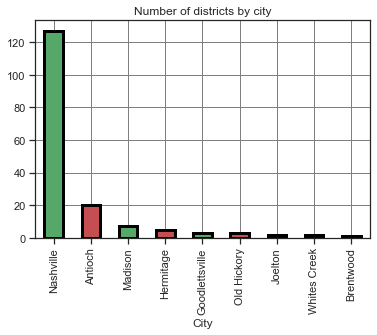

In [63]:
city_gb.sort_values(ascending=False).plot(kind='bar', edgecolor='black',
                                          linewidth=3, title="Number of districts by city",
                                          color=['g', 'r'], )
plt.grid(linewidth=1, color='gray')
plt.show()

In [64]:
level_gb = sd_pd.groupby('School Level')['School ID'].count()
level_gb

School Level
Adult                           1
Alternative Learning Center     2
Charter                        32
Elementary School              76
GATE Center                     1
High School                    17
Middle School                  31
Non-Traditional                 5
Non-Traditional - Hybrid        2
Special Education               3
Name: School ID, dtype: int64

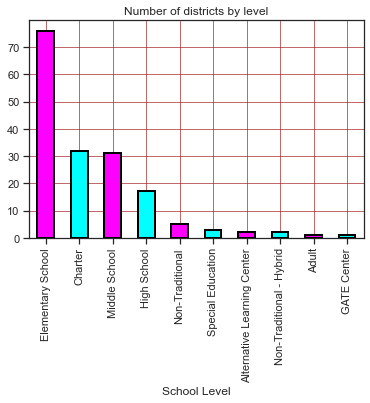

In [65]:
level_gb.sort_values(ascending=False).plot(kind='bar', color=['magenta', 'cyan'],
                                           edgecolor='black', linewidth=2,
                                            title="Number of districts by level")
plt.grid(linewidth=0.7, color='brown')
plt.show()

In [66]:
sd_pd.groupby('State')['State'].count()

State
TN    170
Name: State, dtype: int64

## Geopspatial data exploration: school data

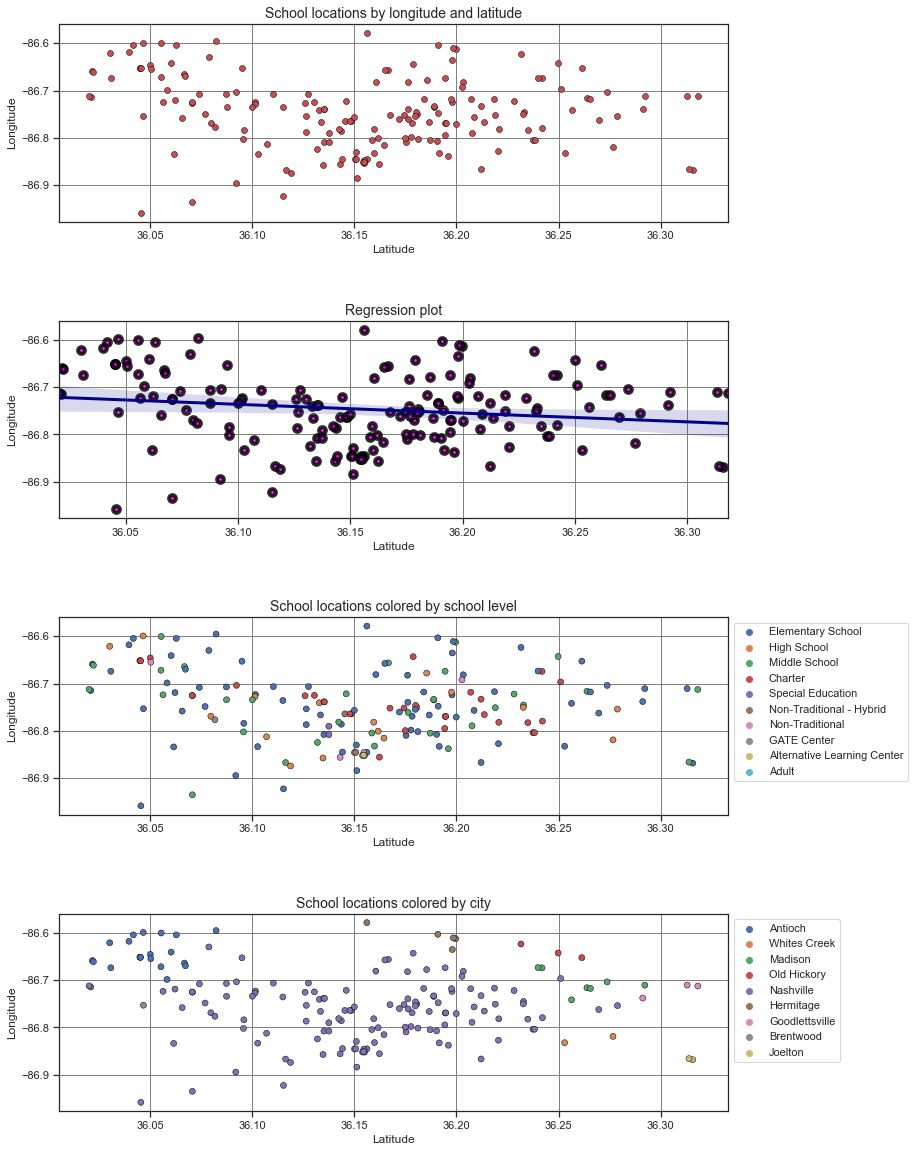

In [67]:
fig, ax = plt.subplots(4,1, figsize=(12,20))

sns.scatterplot(x='Latitude', y='Longitude', 
                data=sd_pd, color='r', edgecolor='black', ax=ax[0])
ax[0].set_title('School locations by longitude and latitude', fontsize=14)
ax[0].grid(linewidth=1, color='gray')

sns.regplot(x='Latitude', y='Longitude', 
            data=sd_pd, color='g', ax=ax[1],
            scatter_kws={'s':45, 'alpha':0.83, 'color':'magenta', 'edgecolor':'black',
            'linewidth':4},
            line_kws={'color': 'darkblue', 'linewidth':3})
ax[1].set_title('Regression plot', fontsize=14)
ax[1].grid(linewidth=1, color='gray')

sns.scatterplot(x='Latitude', y='Longitude', 
                data=sd_pd, color='r', edgecolor='black', ax=ax[2],
                hue='School Level')
ax[2].set_title('School locations colored by school level', fontsize=14)
ax[2].grid(linewidth=1, color='gray')
ax[2].legend(bbox_to_anchor=(1,1), loc='upper left')


sns.scatterplot(x='Latitude', y='Longitude', 
                data=sd_pd, color='r', edgecolor='black', ax=ax[3],
                hue='City') 

ax[3].set_title('School locations colored by city', fontsize=14)
ax[3].grid(linewidth=1, color='gray')
ax[3].legend(bbox_to_anchor=(1,1), loc='upper left')


plt.subplots_adjust(hspace=0.5)
plt.show()

In [68]:
sd_4 = sd_pd.copy()
print(type(nv_shape))
print(type(sd_4))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.frame.DataFrame'>


#### Combining NV shape polygons & scatter location plots: school districts

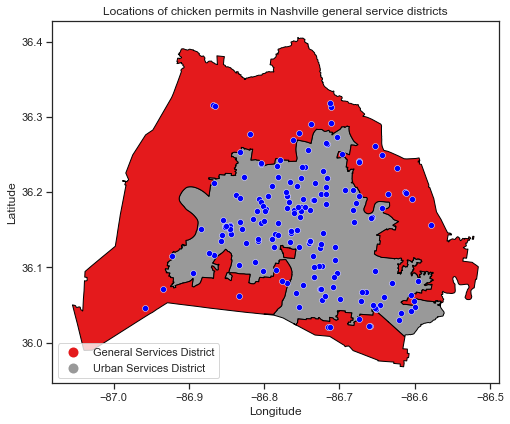

In [69]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))
nv_shape.plot(column='name', legend=True, ax=ax1, edgecolor='black',
              linewidth=1, legend_kwds={'loc':'lower left'}, cmap='Set1', aspect=1)
sns.scatterplot(x='Longitude', y='Latitude', data= sd_4, ax= ax1, color='blue', legend=False)
ax1.set_title('Locations of chicken permits in Nashville general service districts', fontsize=12)
plt.show()

Most schools are in the Urban Services District.

## Constructing a geopandas data frame from the schools geocoordinates

<p>
A geopandas data frame needs a "geometry" column.<br>
This is a special geography format.<br>
The schools data frame is a normal pandas data frame.<br>
It stores lat and long, but not in the geometry format.<br>
The shapely package offers options to create geographic formats like points, lines, and polygons.<br>
The school locations are points.<br>
Below the lats and longs are turned into shape points.
</p> 

In [70]:
sd_5 = sd_4.copy()
print(type(sd_5))
# print(sd_5.columns)
# print(sd_5.head())

<class 'pandas.core.frame.DataFrame'>


In [71]:
sd_5['geometry'] = sd_5.apply(lambda g: Point((g.Longitude, g.Latitude)), axis=1)

In [72]:
sd_5[['Latitude', 'Longitude','geometry']].head()

Latitude  Longitude                                geometry
0  36.021817 -86.658848        POINT (-86.65884778 36.02181712)
1  36.252961 -86.832229          POINT (-86.8322292 36.2529607)
2  36.273766 -86.703832        POINT (-86.70383153 36.27376585)
3  36.231585 -86.623775        POINT (-86.62377469 36.23158465)
4  36.046675 -86.599418  POINT (-86.59941833000001 36.04667464)

Converting the data frame to a geopandas df.

In [73]:
sd_gp = geop.GeoDataFrame(sd_5, crs="EPSG:4326", geometry='geometry')

print(type(sd_gp))
print(sd_gp.crs)
# print(sd_gp.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:4326


Changing the coordinate reference system from decimals to meters (3857).

In [74]:
sd_gp_meters = sd_gp.copy()

sd_gp_meters.geometry = sd_gp_meters.geometry.to_crs(epsg = 3857) 

print(sd_gp_meters.crs)
print(sd_gp.loc[:2,'geometry'])
print(sd_gp_meters.geometry[:2])

epsg:3857
0    POINT (-86.65885 36.02182)
1    POINT (-86.83223 36.25296)
2    POINT (-86.70383 36.27377)
Name: geometry, dtype: geometry
0    POINT (-9646818.808 4303623.790)
1    POINT (-9666119.539 4335484.432)
Name: geometry, dtype: geometry


Using the both geo df.

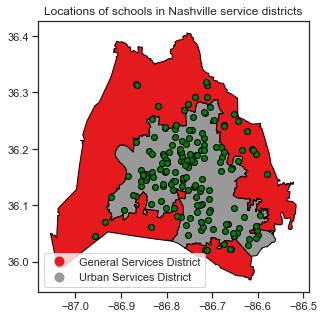

In [75]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 5))

nv_shape.plot(column='name', legend=True, ax=ax1, edgecolor='black',
              linewidth=1, legend_kwds={'loc':'lower left'}, cmap='Set1', aspect=1)
sd_gp.plot(ax=ax1, edgecolor='black', color='green')


ax1.set_title('Locations of schools in Nashville service districts', fontsize=12)
plt.show()

## School districts

In [76]:
sdist = geop.read_file('datasets/school_districts.geojson')

print(type(sdist))


<class 'geopandas.geodataframe.GeoDataFrame'>


In [77]:
print(sdist.columns.to_list())

['first_name', 'city', 'zip', 'email', 'state', 'last_name', 'address', 'position', 'term_expir', 'district', 'phone', 'geometry']


In [78]:
sdist.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   first_name  9 non-null      object  
 1   city        9 non-null      object  
 2   zip         9 non-null      object  
 3   email       9 non-null      object  
 4   state       9 non-null      object  
 5   last_name   9 non-null      object  
 6   address     9 non-null      object  
 7   position    9 non-null      object  
 8   term_expir  9 non-null      object  
 9   district    9 non-null      object  
 10  phone       9 non-null      object  
 11  geometry    9 non-null      geometry
dtypes: geometry(1), object(11)
memory usage: 992.0+ bytes


In [79]:
sdist[[ 'city', 'district']].head()

city district
0  Nashville        1
1    Madison        3
2  Nashville        2
3  Hermitage        4
4  Nashville        9

In [80]:
pprint.pprint(sdist[['city', 'geometry']].head())

        city                                           geometry
0  Nashville  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...
1    Madison  MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ...
2  Nashville  MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ...
3  Hermitage  MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ...
4  Nashville  MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ...


In [81]:
sdist.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   first_name  9 non-null      object  
 1   city        9 non-null      object  
 2   zip         9 non-null      object  
 3   email       9 non-null      object  
 4   state       9 non-null      object  
 5   last_name   9 non-null      object  
 6   address     9 non-null      object  
 7   position    9 non-null      object  
 8   term_expir  9 non-null      object  
 9   district    9 non-null      object  
 10  phone       9 non-null      object  
 11  geometry    9 non-null      geometry
dtypes: geometry(1), object(11)
memory usage: 992.0+ bytes


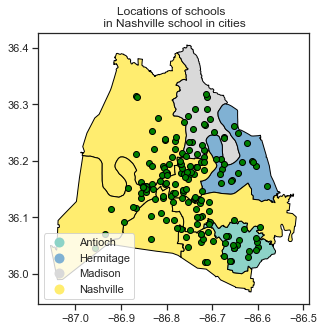

In [82]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 5))

sdist.plot(column='city', legend=True, ax=ax1, edgecolor='black',
              linewidth=1, legend_kwds={'loc':'lower left'}, cmap='Set3', aspect=1)
sd_gp.plot(ax=ax1, edgecolor='black', color='green')


ax1.set_title('Locations of schools \n in Nashville school in cities', fontsize=12)
plt.show()

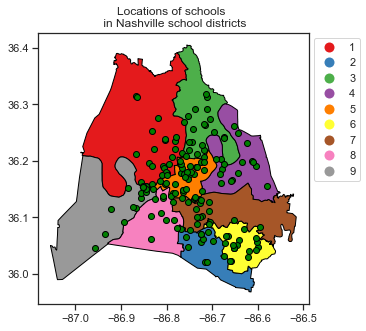

In [83]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 5))

sdist.plot(column='district', legend=True, ax=ax1, edgecolor='black',
           linewidth=1, 
           legend_kwds={'loc':'upper left', 'bbox_to_anchor':(1,1)}, 
           cmap='Set1', aspect=1)
sd_gp.plot(ax=ax1, edgecolor='black', color='green')


ax1.set_title('Locations of schools \n in Nashville school districts', fontsize=12)
plt.show()

### Attributes of school data
#### Areas

Calculating the areas of the school location data.

In [84]:
sd_gp_meters.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
print(sd_gp_meters.geometry.area.unique())
print(sd_gp_meters.geometry.area[:3])

[0.]
0    0.0
1    0.0
2    0.0
dtype: float64


The areas are all 0. This was expected. A location as point has not got an area.<br>
What about the school district areas?

In [86]:
sdist_m = sdist.to_crs(epsg=3857)

print(sdist_m.crs)

epsg:3857


Areas in meters.

In [87]:
sd_areas_dict_city = {}

for i in range(0, len(sdist_m)):
    a  = sdist_m.geometry[i].area / conversion_m_km
    c =  sdist_m.city[i]
    sd_areas_dict_city[c] = round(a,4)
    
pprint.pprint(sd_areas_dict_city)

{'Antioch': 119.7423,
 'Hermitage': 216.8715,
 'Madison': 218.3699,
 'Nashville': 230.1357}


In [88]:
sd_areas_dict_district = {}

for i in range(0, len(sdist_m)):
    a  = sdist_m.geometry[i].area / conversion_m_km
    c =  sdist_m.district[i]
    sd_areas_dict_district[c] = round(a,4)
    
pprint.pprint(sd_areas_dict_district)

{'1': 563.1344,
 '2': 127.6154,
 '3': 218.3699,
 '4': 216.8715,
 '5': 98.4696,
 '6': 119.7423,
 '7': 230.1357,
 '8': 164.1375,
 '9': 353.2321}


In [89]:
ad_v = list(sd_areas_dict_district.values())
ad_v_m = list(np.array(ad_v) * conversion_miles)
ad_v_m = [round(i,4) for i in ad_v_m]
ad_v_m

[217.4262,
 84.3126,
 49.2723,
 83.7341,
 136.3829,
 63.3735,
 38.0191,
 46.2325,
 88.8554]

In [90]:
df_sd_kmm = pd.DataFrame(zip(ad_v, ad_v_m), columns=['a_km2', 'a_m2'])
df_sd_kmm.index.name = 'School_districts'
df_sd_kmm

a_km2      a_m2
School_districts                    
0                 563.1344  217.4262
1                 218.3699   84.3126
2                 127.6154   49.2723
3                 216.8715   83.7341
4                 353.2321  136.3829
5                 164.1375   63.3735
6                  98.4696   38.0191
7                 119.7423   46.2325
8                 230.1357   88.8554

#### GeoSeries Centroids
<p>
centers are derived from geometry variables.<br>
Geometry variables are shapes or areas consisting of line or polygons.<br>
Centroids are points in the centers of areas.
<\p>    


In [91]:
print(sdist_m.columns)
print(sdist_m[['district', 'city', 'geometry']].head())


Index(['first_name', 'city', 'zip', 'email', 'state', 'last_name', 'address',
       'position', 'term_expir', 'district', 'phone', 'geometry'],
      dtype='object')
  district       city                                           geometry
0        1  Nashville  MULTIPOLYGON (((-9659344.056 4353528.767, -965...
1        3    Madison  MULTIPOLYGON (((-9657371.823 4356392.677, -965...
2        2  Nashville  MULTIPOLYGON (((-9658854.027 4312092.829, -965...
3        4  Hermitage  MULTIPOLYGON (((-9638150.956 4329465.543, -963...
4        9  Nashville  MULTIPOLYGON (((-9681775.713 4329318.217, -968...


In [92]:
sdist_m.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [93]:
sdistrict_centroids = \
pd.DataFrame(list(zip(sdist_m['district'], sdist_m.geometry.centroid)),
             columns=['District', 'Centroid'])

print(type(sdistrict_centroids))
sdistrict_centroids

<class 'pandas.core.frame.DataFrame'>


District                                      Centroid
0        1  POINT (-9669306.578090096 4336855.418278796)
1        3   POINT (-9654029.683996875 4339936.35204548)
2        2   POINT (-9651575.21904064 4304781.405522227)
3        4  POINT (-9644681.594034586 4327762.316595947)
4        9  POINT (-9679704.606253924 4314937.563265623)
5        8  POINT (-9665580.354145957 4312107.937686061)
6        5  POINT (-9657204.515402177 4324033.296229443)
7        6  POINT (-9644015.599213194 4307430.029329575)
8        7  POINT (-9645050.502678297 4315506.700083248)

In [94]:
sdistrict_centroids.iloc[0,:]

District                                               1
Centroid    POINT (-9669306.578090096 4336855.418278796)
Name: 0, dtype: object

In [95]:
print(sdist_m['district'][0])
district_1 = sdist_m.geometry[0].centroid
print(district_1)

1
POINT (-9669306.578090096 4336855.418278796)


In [96]:
dist1_series = geop.GeoSeries(district_1, crs='EPSG:3857')

print(type(dist1_series))
print(dist1_series.crs)
print(dist1_series)

<class 'geopandas.geoseries.GeoSeries'>
EPSG:3857
0    POINT (-9669306.578 4336855.418)
dtype: geometry


In [97]:
print(sdist_m['district'][8])

district_7 = sdist_m.geometry[8].centroid

print(district_7)
print(type(district_7))

7
POINT (-9645050.502678297 4315506.700083248)
<class 'shapely.geometry.point.Point'>


In [98]:
dist7_series = geop.GeoSeries(district_7, crs='EPSG:3857')

print(type(dist7_series))
print(dist7_series.crs)
print(dist7_series)

<class 'geopandas.geoseries.GeoSeries'>
EPSG:3857
0    POINT (-9645050.503 4315506.700)
dtype: geometry


In [99]:
sdist_m.geometry.centroid

0    POINT (-9669306.578 4336855.418)
1    POINT (-9654029.684 4339936.352)
2    POINT (-9651575.219 4304781.406)
3    POINT (-9644681.594 4327762.317)
4    POINT (-9679704.606 4314937.563)
5    POINT (-9665580.354 4312107.938)
6    POINT (-9657204.515 4324033.296)
7    POINT (-9644015.599 4307430.029)
8    POINT (-9645050.503 4315506.700)
dtype: geometry

In [100]:
sdist_m.geometry.centroid.distance(sdist_m.geometry.centroid)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
dtype: float64

Center of Nashville

In [101]:
nv_center = nv_shape_unary_gdf.to_crs(3857).centroid
nv_center

0    POINT (-9660854.045 4323997.190)
dtype: geometry

In [102]:
nv_center_4 = nv_center.to_crs(4326)
nv_center_4

0    POINT (-86.78493 36.16970)
dtype: geometry

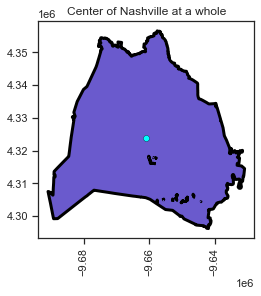

In [103]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

nv_shape_unary_gdf.to_crs(3857).plot(edgecolor='black', linewidth=3, color='slateblue', ax=ax)
nv_center.plot(ax=ax, edgecolor='black', linewidth=0.3, color='aqua')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.title('Center of Nashville at a whole')
plt.show()

### GeoSeries.distance()

<p>
allows to calculate the distance between two points.<br>
The "from" point is here the Nashville mayors office Public Square, Suite 100
Nashville, TN 37201.<br>
Latitude and longitude coordinates are: 36.166840 -86.778200.<br>
The "other" points are the centroids from above.
</p> 

In [104]:
mayor = geop.GeoSeries(Point((-86.778200, 36.166840 )), crs="EPSG:4326")

print(type(mayor))
print(mayor)
print(mayor.crs)

<class 'geopandas.geoseries.GeoSeries'>
0    POINT (-86.77820 36.16684)
dtype: geometry
EPSG:4326


In [105]:
mayor_2 = mayor.copy()
mayor_2 = mayor.to_crs(3857)

print(type(mayor_2))
print(mayor_2.crs)
print(mayor_2)
print(mayor_2.index)

<class 'geopandas.geoseries.GeoSeries'>
epsg:3857
0    POINT (-9660105.036 4323602.650)
dtype: geometry
RangeIndex(start=0, stop=1, step=1)


Distance of district 1 centroid to the mayor's office.

In [106]:
dist_dist1 = mayor_2.distance(other=district_1)

distance_dist1_m = round(float(dist_dist1))
print(distance_dist1_m, 'm')

distance_dist1_km = round(float(dist_dist1 / 1000),2)
print(distance_dist1_km, 'km')

16134 m
16.13 km


Distance of district 7 centroid to the mayor's office.

In [107]:
distance_dist7 = mayor_2.distance(other=district_7)

distance_dist7_m = round(float(distance_dist7))
print(distance_dist7_m )

distance_dist7_km = round(float(distance_dist7/1000),2)
print(distance_dist7_km )

17093
17.09


Distances between mayor and every school district centroid.

In [108]:
sd_centers_df = \
geop.GeoDataFrame(sdistrict_centroids, crs='EPSG:3857', geometry='Centroid')

sd_centers_df.rename(columns={'Centroid': 'geometry'}, inplace=True)

print(type(sd_centers_df))
print(sd_centers_df.crs)
print(sd_centers_df.head(1))

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:3857
  District                          geometry
0        1  POINT (-9669306.578 4336855.418)


In [109]:
distances_mayor = []

for n, row in enumerate(sd_centers_df.iterrows()):
    # print(type(row[1]))
    # print(row[1][1])
    
    distance = round(float(mayor_2.distance(other=row[1][1])),2)
    distances_mayor.append(distance)
    
distances_mayor

[16133.95,
 17426.98,
 20663.91,
 15974.52,
 21429.58,
 12732.14,
 2932.32,
 22812.8,
 17093.37]

In [110]:
sd_centers_df_2 = sd_centers_df.copy()

sd_centers_df_2.rename(columns={'geometry': 'district centroid'}, inplace=True)
sd_centers_df_2['distance_m'] = distances_mayor
sd_centers_df_2['distance km'] = round(sd_centers_df_2['distance_m'] / 1000, 2)

sd_centers_df_2

District                 district centroid  distance_m  distance km
0        1  POINT (-9669306.578 4336855.418)    16133.95        16.13
1        3  POINT (-9654029.684 4339936.352)    17426.98        17.43
2        2  POINT (-9651575.219 4304781.406)    20663.91        20.66
3        4  POINT (-9644681.594 4327762.317)    15974.52        15.97
4        9  POINT (-9679704.606 4314937.563)    21429.58        21.43
5        8  POINT (-9665580.354 4312107.938)    12732.14        12.73
6        5  POINT (-9657204.515 4324033.296)     2932.32         2.93
7        6  POINT (-9644015.599 4307430.029)    22812.80        22.81
8        7  POINT (-9645050.503 4315506.700)    17093.37        17.09

#### Spatial joins

<p>
A spatial join uses binary predicates such as intersects and crosses to combine two GeoDataFrames based on the spatial relationship between their geometries.
</p> 

<p>
A common use case might be a spatial join between a point layer and a polygon layer where you want to retain the point geometries and grab the attributes of the intersecting polygons.<br>
<a href="https://geopandas.org/gallery/spatial_joins.html" target="_blank">geopandas.org</a> 
</p> 

<p>
The matching is achieved with the geometry columns, every GeoPandasDataframe has got.<br>
Without a geometry col a data structure cannot be a GeoPandasDataframe.<br>
The modi of joins in GeoPandas follows SQL logic.
</p>



Joining schools with the main service districts.

In [111]:
# print(type(nv_shape))
# print(nv_shape)
# print(nv_shape.crs)
print(nv_shape.name)

0      Urban Services District
1    General Services District
Name: name, dtype: object


In [112]:
# sdist_m : school location data

# print(type(sdist_m.head(1))
# print(type(sdist_m))

sdist_m_4326 = sdist_m.to_crs(4326)
print(sdist_m_4326.crs)

epsg:4326


Intersects returns all cols, when matching occurs.

In [113]:
schools_intersect_maindistricts = geop.sjoin(sd_gp, nv_shape, op = 'intersects')
print(schools_intersect_maindistricts.shape)


(170, 21)


All schools fall into the main service districts.

In [114]:
print(schools_intersect_maindistricts.name.unique())
print(schools_intersect_maindistricts.name.value_counts())

['General Services District' 'Urban Services District']
Urban Services District      139
General Services District     31
Name: name, dtype: int64


In [115]:
print("Schools in maindistricts: {}".format(schools_intersect_maindistricts.shape[0]))

# schools_intersect_maindistricts.head(1)
schools_intersect_maindistricts.columns.tolist()

Schools in maindistricts: 170


['School ID',
 'School Name',
 'Street Address',
 'City',
 'State',
 'ZIP Code',
 'Phone Number',
 'School State ID',
 'School Level',
 'Lowest Grade',
 'Highest Grade',
 'Latitude',
 'Longitude',
 'School Website',
 'Cluster',
 'Mapped Location',
 'geometry',
 'index_right',
 'area_sq_mi',
 'name',
 'objectid']

The variables 'index_right', 'area_sq_mi' for example are from the main districts df (nv_shape).<br>
School location points have not any areas.

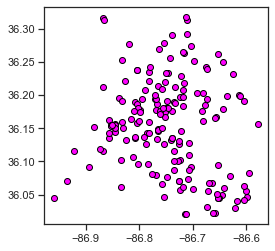

In [116]:
schools_intersect_maindistricts.plot(edgecolor='black', color='magenta')
plt.show()

Does a left join change anything?<br>
Probably not in this case as all schools fall into one of the two districts.

In [117]:
schools_intersect_maindistricts_left = geop.sjoin(sd_gp, nv_shape, how = 'left')

# print(type(schools_intersect_maindistricts_left))
print(schools_intersect_maindistricts_left.shape)

(170, 21)


Does a left join change anything?<br>
Probably not in this case.

In [118]:
schools_intersect_maindistricts_within = geop.sjoin(sd_gp, nv_shape, op = 'within')

print(type(schools_intersect_maindistricts_within))
print(schools_intersect_maindistricts_within.shape)
print("Schools within main districts: {}".format(schools_intersect_maindistricts_within.shape[0]))

<class 'geopandas.geodataframe.GeoDataFrame'>
(170, 21)
Schools within main districts: 170


Probably not in this case as all schools fall into one of the two districts.

Joining schools with school districts.

In [119]:
# print(sd_gp.head(1))
# print(sd_gp.crs)
# print(type(sd_gp))
# print(sd_gp.head())

In [120]:
school_intersect_districts = geop.sjoin(sd_gp, sdist_m_4326, op = 'intersects')
print(type(school_intersect_districts))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [121]:
print(sd_gp.shape)
print(school_intersect_districts.shape)

(170, 17)
(170, 29)


The columns of the joined df are consisting of the cols of the joining df.

In [122]:
# concat allows to create df with different length of cols

intersect_schools = \
pd.concat([pd.Series(sd_gp.columns.tolist()), 
           pd.Series(sdist_m_4326.columns.tolist()),
           pd.Series(school_intersect_districts.columns.tolist())], 
           ignore_index=True, 
           axis=1)

intersect_schools.columns = ['sd_gp', 'sdist_m_4326' ,'Joined_df']

intersect_schools = intersect_schools.fillna(0)
intersect_schools

sd_gp sdist_m_4326        Joined_df
0         School ID   first_name        School ID
1       School Name         city      School Name
2    Street Address          zip   Street Address
3              City        email             City
4             State        state            State
5          ZIP Code    last_name         ZIP Code
6      Phone Number      address     Phone Number
7   School State ID     position  School State ID
8      School Level   term_expir     School Level
9      Lowest Grade     district     Lowest Grade
10    Highest Grade        phone    Highest Grade
11         Latitude     geometry         Latitude
12        Longitude            0        Longitude
13   School Website            0   School Website
14          Cluster            0          Cluster
15  Mapped Location            0  Mapped Location
16         geometry            0         geometry
17                0            0      index_right
18                0            0       first_name
19                0            0             city
20                0            0              zip
21                0            0            email
22                0            0            state
23                0            0        last_name
24                0            0          address
25                0            0         position
26                0            0       term_expir
27                0            0         district
28                0            0            phone

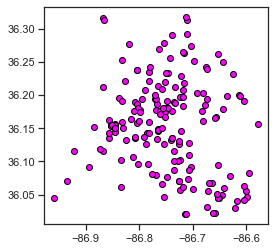

In [123]:
school_intersect_districts.plot(edgecolor='black', color='magenta')
plt.show()

Joining schools with NV neighborhoods.<br>
Other than above not all schools might have a neighborhoods.

In [124]:
# print(type(nv))
# print(nv.head(1))

In [125]:
schools_intersect_neighborhoods = geop.sjoin(sd_gp, nv, op = 'intersects')
schools_intersect_neighborhoods_left = geop.sjoin(sd_gp, nv, how = 'left')
schools_intersect_neighborhoods_right = geop.sjoin(sd_gp, nv, how = 'right')

print(type(schools_intersect_neighborhoods))
# print(schools_intersect_neighborhoods.head(1))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [126]:
print("Intersect:", schools_intersect_neighborhoods.shape)
print("Left:", schools_intersect_neighborhoods_left.shape)
print("Right:", schools_intersect_neighborhoods_right.shape)

Intersect: (78, 19)
Left: (170, 19)
Right: (318, 19)


In [127]:
schools_intersect_neighborhoods.City.value_counts()

Nashville       69
Antioch          2
Joelton          2
Old Hickory      2
Whites Creek     2
Hermitage        1
Name: City, dtype: int64

In [128]:
n_unique_neigh = len(schools_intersect_neighborhoods.name.unique())
print("Number of unique neighborhoods: {}".format(n_unique_neigh))

Number of unique neighborhoods: 48


In [129]:
print("Schools intersecting with neighborhoods: {}".format(schools_intersect_neighborhoods.shape[0]))

Schools intersecting with neighborhoods: 78


Not in all neighborhoods are schools.

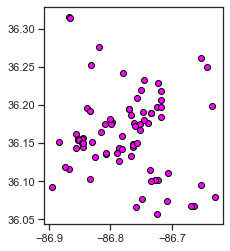

In [130]:
schools_intersect_neighborhoods.plot(edgecolor='black', color='magenta')
plt.show()

Top five neigborhoods by number of schools.

In [131]:
schools_intersect_neighborhoods[['School Name', 'name']].groupby('name').aggregate('count').\
sort_values(ascending=False, by='School Name')[:5]

School Name
name                            
Nations                        6
Sylvan Park                    3
Rosebank                       3
Chestnut Hill (TAG)            3
Inglewood                      3

Joining areas (polygons).

In [132]:
maindist_inter_neigh_within = geop.sjoin(nv, nv_shape, op='within')
print(maindist_inter_neigh_within.shape)

(258, 6)


In [133]:
maindist_inter_neigh = geop.sjoin(nv, nv_shape, op='intersects')
print(maindist_inter_neigh.shape)

(307, 6)


In [134]:
maindist_inter_neigh.head(2)

name_left                                           geometry  \
0  Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...   
1        Charlotte Park  MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ...   

   index_right  area_sq_mi               name_right  objectid  
0            0       198.0  Urban Services District       0.0  
1            0       198.0  Urban Services District       0.0

In [135]:
print(maindist_inter_neigh.columns.tolist())

['name_left', 'geometry', 'index_right', 'area_sq_mi', 'name_right', 'objectid']


In [136]:
maindist_inter_neigh['name_left'].unique()[:5]

array(['Historic Buena Vista', 'Charlotte Park', 'Hillwood', 'West Meade',
       'White Bridge'], dtype=object)

In [137]:
maindist_inter_neigh['name_right'].value_counts().sort_values(ascending=False)[:10]

Urban Services District      195
General Services District    112
Name: name_right, dtype: int64

Of the neighborhoods 195 are in the USD and 112 in the GSD.

In [138]:
maindist_inter_neigh = maindist_inter_neigh.\
                       rename(columns={'name_right':'main_Districts', 'name_left':'neigborhoods'})
# maindist_inter_neigh.main_Districts

In [139]:
maindist_inter_neigh[['neigborhoods', 'main_Districts']].groupby('main_Districts').agg('count')

neigborhoods
main_Districts                         
General Services District           112
Urban Services District             195

# Chicken permits in Nashville data set
## Import json data: chicken permits in Nashville

In [140]:
chickens = pd.read_json('https://data.nashville.gov/resource/vpdy-5e23.json')

## Data exploration: chicken permits data

In [141]:
print(type(chickens))
print(chickens.shape)
print(chickens.columns.tolist)

<class 'pandas.core.frame.DataFrame'>
(313, 13)
<bound method IndexOpsMixin.tolist of Index(['permit', 'city', 'state', 'zip', 'district', 'date_issued',
       'mapped_location', ':@computed_region_f73m_vb2k',
       ':@computed_region_gisn_y5cm', ':@computed_region_v3ji_vzam',
       ':@computed_region_c9xn_skx3', ':@computed_region_sjpq_96s8',
       ':@computed_region_cfa7_hbpz'],
      dtype='object')>


In [142]:
chickens.head(3)

permit       city state    zip  district              date_issued  \
0   288.0  Nashville    TN  37211      30.0  2014-11-26T00:00:00.000   
1   435.0  Nashville    TN  37211      19.0  2015-05-18T00:00:00.000   
2   270.0  Nashville    TN  37216       7.0  2014-11-20T00:00:00.000   

                                     mapped_location  \
0  {'latitude': '36.069132', 'longitude': '-86.72...   
1  {'latitude': '36.069132', 'longitude': '-86.72...   
2  {'latitude': '36.216134', 'longitude': '-86.72...   

   :@computed_region_f73m_vb2k  :@computed_region_gisn_y5cm  \
0                          3.0                          5.0   
1                          3.0                          5.0   
2                          2.0                          2.0   

   :@computed_region_v3ji_vzam  :@computed_region_c9xn_skx3  \
0                         2005                         25.0   
1                         2005                         25.0   
2                         2005                          8.0   

   :@computed_region_sjpq_96s8  :@computed_region_cfa7_hbpz  
0                      15803.0                          NaN  
1                      15803.0                          NaN  
2                      16164.0                         82.0

In [143]:
chickens.tail(3)

permit       city state    zip  district              date_issued  \
310    54.0  Nashville    TN  37204       6.0  2014-12-03T00:00:00.000   
311   456.0  Nashville    TN  37207       5.0  2015-06-24T00:00:00.000   
312   325.0  Nashville    TN  37216       7.0  2014-11-19T00:00:00.000   

                                       mapped_location  \
310  {'latitude': '36.109305', 'longitude': '-86.77...   
311  {'latitude': '36.224945', 'longitude': '-86.77...   
312  {'latitude': '36.216134', 'longitude': '-86.72...   

     :@computed_region_f73m_vb2k  :@computed_region_gisn_y5cm  \
310                          6.0                          5.0   
311                          1.0                          6.0   
312                          2.0                          2.0   

     :@computed_region_v3ji_vzam  :@computed_region_c9xn_skx3  \
310                         2005                         23.0   
311                         2005                          2.0   
312                         2005                          8.0   

     :@computed_region_sjpq_96s8  :@computed_region_cfa7_hbpz  
310                      30813.0                          NaN  
311                      15550.0                          NaN  
312                      16164.0                         82.0

In [144]:
chickens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   permit                       307 non-null    float64
 1   city                         313 non-null    object 
 2   state                        313 non-null    object 
 3   zip                          313 non-null    int64  
 4   district                     310 non-null    float64
 5   date_issued                  311 non-null    object 
 6   mapped_location              313 non-null    object 
 7   :@computed_region_f73m_vb2k  305 non-null    float64
 8   :@computed_region_gisn_y5cm  305 non-null    float64
 9   :@computed_region_v3ji_vzam  313 non-null    int64  
 10  :@computed_region_c9xn_skx3  305 non-null    float64
 11  :@computed_region_sjpq_96s8  307 non-null    float64
 12  :@computed_region_cfa7_hbpz  165 non-null    float64
dtypes: float64(7), int64

In [145]:
chickens = chickens.drop(chickens.columns[7:13], axis=1)

In [146]:
nas =       pd.DataFrame(zip(chickens.isna().sum(), chickens.count(),
                chickens.isna().sum() + chickens.count()), 
            columns=['NA\'s', 'Values', 'Total'], 
            index=chickens.columns)

nas

NA's  Values  Total
permit              6     307    313
city                0     313    313
state               0     313    313
zip                 0     313    313
district            3     310    313
date_issued         2     311    313
mapped_location     0     313    313

### Groupby: chicken permits data

In [147]:
gb_district = chickens.groupby('district')['permit'].sum()
gb_district[:3]

district
0.0     335.0
1.0    1558.0
2.0    2024.0
3.0     226.0
Name: permit, dtype: float64

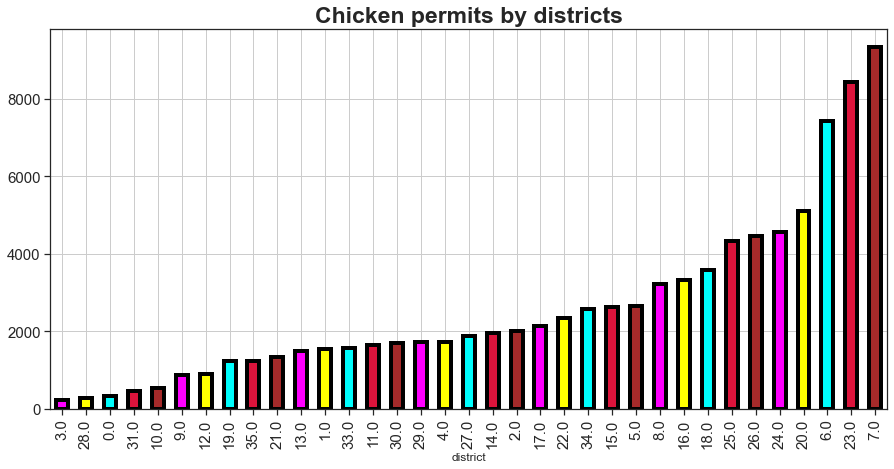

In [148]:
gb_district.sort_values().plot(kind='bar', 
                               figsize=(15,7), edgecolor='black', linewidth=4,
                               color=['magenta', 'yellow', 'cyan', "crimson", 'brown'],
                               title='Chicken permits by districts', fontsize=15,
                               grid=True)

plt.title('Chicken permits by districts', fontsize=23, fontweight='bold')

plt.show()

### Geopspatial data exploration: chicken permits data
<b>Longitude and latitudes</b>

<p>
The geocoordinates are stored together with other information
in the variable mapped_location.<br>
The geocoorindates should be stored as tidy variables each in one column.
</p> 

In [149]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 1000,
                       ):
    print(chickens.loc[:5, ['city', 'mapped_location']])

# Why doesn't context print not the whole dict?

        city                                    mapped_location
0  Nashville  {'latitude': '36.069132', 'longitude': '-86.72...
1  Nashville  {'latitude': '36.069132', 'longitude': '-86.72...
2  Nashville  {'latitude': '36.216134', 'longitude': '-86.72...
3  Nashville  {'latitude': '36.216134', 'longitude': '-86.72...
4  Nashville  {'latitude': '36.064367', 'longitude': '-86.96...
5  Nashville  {'latitude': '36.112469', 'longitude': '-86.86...


Trying to understand the construction.

In [150]:
ml = chickens.mapped_location
print(type(ml))
print(ml[:3])

<class 'pandas.core.series.Series'>
0    {'latitude': '36.069132', 'longitude': '-86.72...
1    {'latitude': '36.069132', 'longitude': '-86.72...
2    {'latitude': '36.216134', 'longitude': '-86.72...
Name: mapped_location, dtype: object


In [151]:
ml10 = ml[10]
print(type(ml10))
print(ml10['latitude'])

<class 'dict'>
36.106646


Conclusion:<br>
This a nested construction, whereby a n dicts are stored inside of pd.Series.<br>
Therefore the construction is iterated with list comprehensions and not as a dict of dicts.

In [152]:
latitudes = [i['latitude'] for i in ml]
latitudes = [float(i) for i in latitudes]

In [153]:
print(type(latitudes[99]))
print(len(latitudes))
print(latitudes[:5])

<class 'float'>
313
[36.069132, 36.069132, 36.216134, 36.216134, 36.064367]


In [154]:
longitudes = [i['longitude'] for i in ml]
longitudes = [float(i) for i in longitudes]

In [155]:
print(longitudes[:5])
print(type(longitudes[15]))
print(len(longitudes))

[-86.724578, -86.724578, -86.726204, -86.726204, -86.96029]
<class 'float'>
313


In [156]:
chickens_2 = chickens.copy()

In [157]:
chickens_2['Longitudes'] = longitudes
chickens_2['Latitudes'] = latitudes

In [158]:
chickens_2.columns

Index(['permit', 'city', 'state', 'zip', 'district', 'date_issued',
       'mapped_location', 'Longitudes', 'Latitudes'],
      dtype='object')

In [159]:
chickens_2[['Longitudes', 'Latitudes']].head()

Longitudes  Latitudes
0  -86.724578  36.069132
1  -86.724578  36.069132
2  -86.726204  36.216134
3  -86.726204  36.216134
4  -86.960290  36.064367

In [160]:
geo_354 = chickens_2[['Longitudes', 'Latitudes']]
geo_354.aggregate({'min', 'max' ,'median'})

Longitudes  Latitudes
min     -86.960290  35.946013
max     -86.104461  36.350389
median  -86.739624  36.133256

In [161]:
geo_354.head(3)

Longitudes  Latitudes
0  -86.724578  36.069132
1  -86.724578  36.069132
2  -86.726204  36.216134

In [162]:
geo_354.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitudes  313 non-null    float64
 1   Latitudes   313 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


### Is there a problem wiith overplotting?

A lot of geocoordinate points are close to each other and fit in nearby bins.



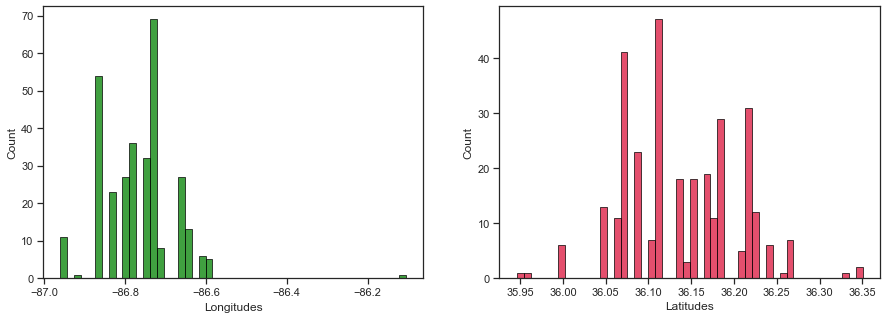

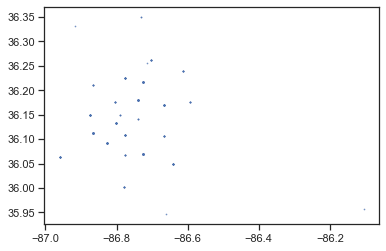

<Figure size 576x576 with 0 Axes>

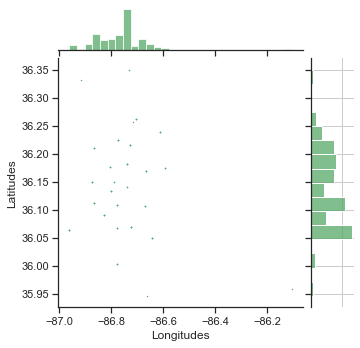

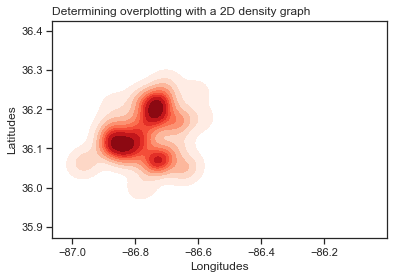

In [163]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
sns.histplot(x='Longitudes', data=geo_354, edgecolor='black', color='green', ax=ax1, bins=50)

ax2 = fig.add_subplot(1,2,2)
sns.histplot(x='Latitudes', data=geo_354, edgecolor='black', color='crimson', ax=ax2, bins=50)
plt.show()


plt.scatter(x=chickens_2['Longitudes'], y=chickens_2['Latitudes'], s=0.5, alpha=0.7)
plt.show()

plt.figure(figsize=(8,8))
sns.jointplot(x='Longitudes', y='Latitudes',  data= chickens_2, height=5,
              color='g', s=2)
plt.ylabel('longitude')
plt.xlabel('latitude')

ax1.set_xlim(left=-86.8, right=-86.801)


plt.grid()
plt.show()

sns.kdeplot(data = chickens_2, x='Longitudes', y='Latitudes', cmap="Reds", shade=True)
plt.title('Determining overplotting with a 2D density graph', loc='left')
plt.show()



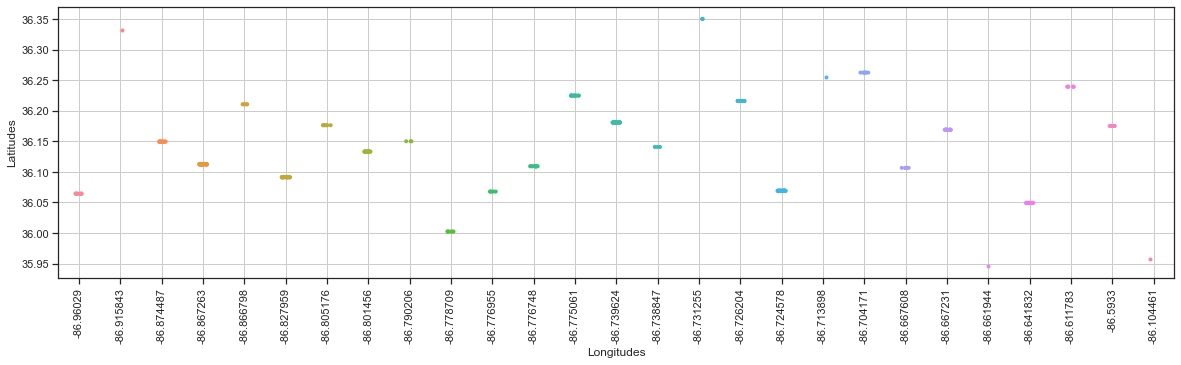

In [164]:
plt.figure(figsize=(20,5))
sns.stripplot(x='Longitudes', y='Latitudes',  data= chickens_2, s=4)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### Locations: chicken permits data

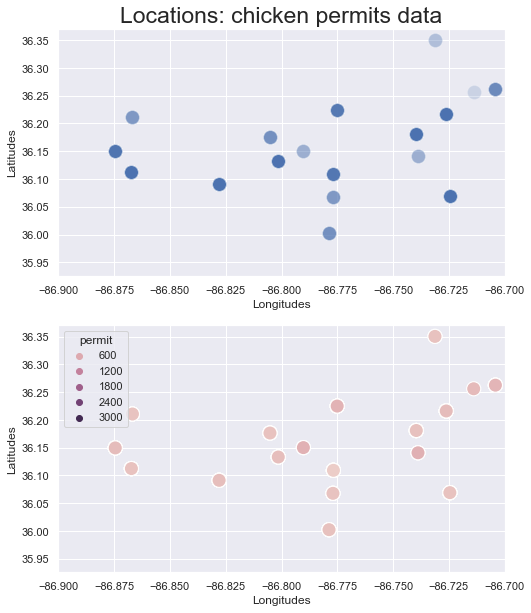

In [165]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))

sns.scatterplot(x='Longitudes', y='Latitudes', data= chickens_2, ax= ax1, 
                alpha=0.2, 
                s=200,
                marker = "o")
ax1.set_xlim(left=-86.9, right=-86.7)
ax1.set_title('Locations: chicken permits data', fontsize=23)


sns.scatterplot(x='Longitudes', y='Latitudes',  data= chickens_2, ax= ax2, hue='permit', s=200)
ax2.set_xlim(left=-86.9, right=-86.7)
plt.show()

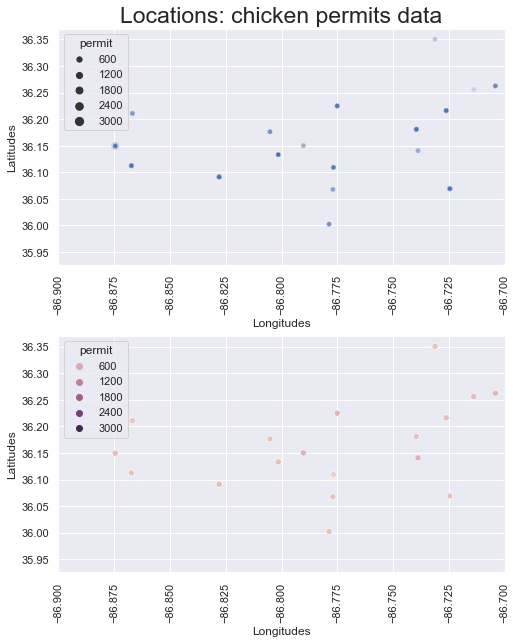

In [166]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))

sns.scatterplot(x='Longitudes', y='Latitudes', data= chickens_2, ax= ax1, alpha=0.2, size="permit")
ax1.set_xlim(left=-86.9, right=-86.7)
ax1.set_title('Locations: chicken permits data', fontsize=23)


sns.scatterplot(x='Longitudes', y='Latitudes', data= chickens_2, ax= ax2, hue='permit')
ax2.set_xlim(left=-86.9, right=-86.7)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


    
plt.subplots_adjust(hspace=0.3)
plt.show()

### Combining shape polygons & scatter location plots
<p>
into layered plots.
</p>


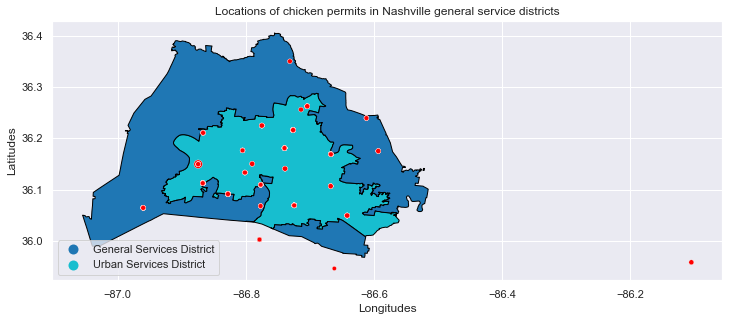

In [167]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 12))
nv_shape.plot(column='name', legend=True, ax=ax1, edgecolor='black',
              linewidth=1, legend_kwds={'loc':'lower left'}, aspect=0.8)
sns.scatterplot(x='Longitudes', y='Latitudes', data= chickens_2, ax= ax1, color='red', 
                size="permit", legend=False)
ax1.set_title('Locations of chicken permits in Nashville general service districts', fontsize=12)
plt.show()

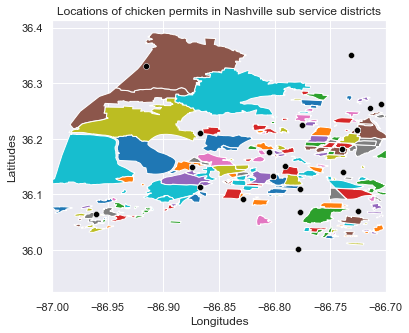

In [168]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5))

nv.plot(ax=ax1, column='name', legend=False, aspect=0.5)
sns.scatterplot(x='Longitudes', y='Latitudes', data= chickens_2, ax= ax1, color='black')
ax1.set_xlim(left=-87, right=-86.7)
ax1.set_title('Locations of chicken permits in Nashville sub service districts', fontsize=12)

plt.show()

It seems that a lot of permits, where issued for the same location or chicken farm.

# Creating interactive maps of Nashville with Folium

<p>
, which is Python package based on the leaflet.js library<br>
or in words of the <a href="https://python-visualization.github.io/folium/" target="_blank">Folium 0.12.1 documentation:</a>
</p> 

<p>
"Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map."<br>

<p>
Below a map is created centered around the <b>Graceland, the home of Elvis Presley, in Memphis</b>, TN.<br>
Latitude: 35.0459425757 / Longitude: -90.0229972176
</p> 

In [169]:
graceland_df = pd.DataFrame([Point((35.0459425757, -90.0229972176 ))],
                            columns=['geometry'])

graceland_gdf = geop.GeoDataFrame(graceland_df, geometry='geometry', crs='EPSG:4326')

graceland_gdf 

geometry
0  POINT (35.046 -90.023)

In [170]:
graceland_point = Point((35.0459425757, -90.0229972176 ))
print(graceland_point)
print(type(graceland_point))


POINT (35.0459425757 -90.02299721759999)
<class 'shapely.geometry.point.Point'>


<b>How are the coordinates of a Shapely point extracted?</b><br>

<p>
Simply subsetting the tuple throws an error.<br>
Instead using the coords-method.<br>
<a href="https://stackoverflow.com/questions/20474549/extract-points-coordinates-from-a-polygon-in-shapely" target="_blank">
stackoverflow.com</a> 
</p> 


In [171]:
print(graceland_point.coords[0][0])
print(type(graceland_point.coords[0][0]))
print(graceland_point.coords[0][1])

grace_lat = graceland_point.coords[0][0]
grace_long = graceland_point.coords[0][1]
grace_coord = [grace_lat, grace_long]
print(grace_coord)

35.0459425757
<class 'float'>
-90.0229972176
[35.0459425757, -90.0229972176]


In [172]:
graceland_gseries = geop.GeoSeries(graceland_point, crs="EPSG:4326")

print(type(graceland_gseries))
print(graceland_gseries)
print(graceland_gseries[0])

<class 'geopandas.geoseries.GeoSeries'>
0    POINT (35.046 -90.023)
dtype: geometry
POINT (35.0459425757 -90.02299721759999)


Another method is to use the x and y methods.

In [173]:
graceland_centerpoint = graceland_gseries[0]
grace_y_long = graceland_centerpoint.y
grace_x_lat = graceland_centerpoint.x

print(grace_y_long)
print(grace_x_lat)

-90.0229972176
35.0459425757


In [174]:
f = folium.Figure(width=600, height=300)

graceland = folium.Map(location = grace_coord, zoom_start=28, tiles='openstreetmap').add_to(f)
#display(graceland)

In [175]:
graceland_gseries

0    POINT (35.046 -90.023)
dtype: geometry

In [176]:
grace_tojson = graceland_gseries.to_json()
grace_tojson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Point", "coordinates": [35.0459425757, -90.0229972176]}, "bbox": [35.0459425757, -90.0229972176, 35.0459425757, -90.0229972176]}], "bbox": [35.0459425757, -90.0229972176, 35.0459425757, -90.0229972176]}'

In [177]:
graceland_json = folium.GeoJson(grace_tojson)

In [178]:
folium.Popup('Graceland').add_to(graceland_json)

In [179]:
graceland_json.add_to(graceland)

In [180]:
display(graceland)

Pop-up Graceland?

#### Folium map of schools in Nashville

In [181]:
geocoord_NV_center = [float(nv_center_4.geometry.y), float(nv_center_4.geometry.x)]

In [182]:
sd_gp.columns

Index(['School ID', 'School Name', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'School State ID', 'School Level',
       'Lowest Grade', 'Highest Grade', 'Latitude', 'Longitude',
       'School Website', 'Cluster', 'Mapped Location', 'geometry'],
      dtype='object')

In [183]:
geocoords_schools_map = []
school_names = []
for row in sd_gp.iterrows():
        geocoord_schools = [row[1]['Latitude'], row[1]['Longitude']]
        geocoords_schools_map.append(geocoord_schools)
        school_name = row[1]['School Name']
        school_names.append(school_name)
        
geocoords_schools_map[:2]
school_names[:4]

['A. Z. Kelley Elementary',
 'Alex Green Elementary',
 'Amqui Elementary',
 'Andrew Jackson Elementary']

In [184]:
f_schools = folium.Figure(width = 500, height = 300)

school_title = """Schools in Nashville within school districts"""

school_title_2 = \
'''<h1 align="center" style="font-size:16px" font-style="italic"><b>{}</b></h2>
'''.format(school_title )

map_schools = folium.Map(location=geocoord_NV_center,
                         width='100%', height='100%', left='0%', top='0%', 
                         position='relative', tiles='OpenStreetMap', 
                         attr=None, min_zoom=2, max_zoom=18, 
                         zoom_start=11, min_lat=- 90, max_lat=90, min_lon=- 180, 
                         max_lon=180, max_bounds=False, crs='EPSG3857', 
                         control_scale=False, prefer_canvas=False, 
                         no_touch=False, disable_3d=False, png_enabled=False)

map_schools.get_root().html.add_child(folium.Element(school_title_2))

# Add school district borders
map_schools_borders = folium.GeoJson(nv.geometry,
                                     style_function = \
                                     lambda x: 
                                     {'color':'black', 'weight':0.5, 'fillColor':'blue'}).\
                                     add_to(map_schools)


for row in sd_gp.iterrows():
        geocoord_schools = [row[1]['Latitude'], row[1]['Longitude']]
        school_name = row[1]['School Name']
        folium.Marker(location=geocoord_schools, popup=school_name,
                      icon = folium.Icon(color='green', icon_color='white', icon='heart-empty', 
                                     angle=0, prefix='glyphicon')).add_to(map_schools)
        


display(map_schools)

# Art work in Nashville data set
## Quick reproduction: art work in Nashville

In [185]:
arty = pd.read_csv('datasets/public_art.csv')

print(type(arty))
print(arty.info())
print(arty[['Title', 'Latitude', 'Longitude']].head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            132 non-null    object 
 1   Last Name        132 non-null    object 
 2   First Name       122 non-null    object 
 3   Location         131 non-null    object 
 4   Medium           128 non-null    object 
 5   Type             132 non-null    object 
 6   Description      87 non-null     object 
 7   Latitude         132 non-null    float64
 8   Longitude        132 non-null    float64
 9   Mapped Location  132 non-null    object 
dtypes: float64(2), object(8)
memory usage: 10.4+ KB
None
                             Title  Latitude  Longitude
0          [Cross Country Runners]  36.12856  -86.83660
1  [Fourth and Commerce Sculpture]  36.16234  -86.77774
2              12th & Porter Mural  36.15790  -86.78817
3                A Spla

In [186]:
arty_gp = arty.copy()
arty_gp['geometry'] = arty.apply(lambda x: Point((x.Longitude, x.Latitude)), axis=1)

# 'EPSG:4326' = decimal crs
arty_gp = geop.GeoDataFrame(arty_gp, crs='EPSG:4326', geometry='geometry')


print(type(arty_gp))
print(arty_gp.crs)
print(arty_gp[['Title', 'Latitude', 'Longitude', 'geometry']].head())

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:4326
                             Title  Latitude  Longitude  \
0          [Cross Country Runners]  36.12856  -86.83660   
1  [Fourth and Commerce Sculpture]  36.16234  -86.77774   
2              12th & Porter Mural  36.15790  -86.78817   
3                A Splash of Color  36.16202  -86.79975   
4             A Story of Nashville  36.16215  -86.78205   

                     geometry  
0  POINT (-86.83660 36.12856)  
1  POINT (-86.77774 36.16234)  
2  POINT (-86.78817 36.15790)  
3  POINT (-86.79975 36.16202)  
4  POINT (-86.78205 36.16215)  


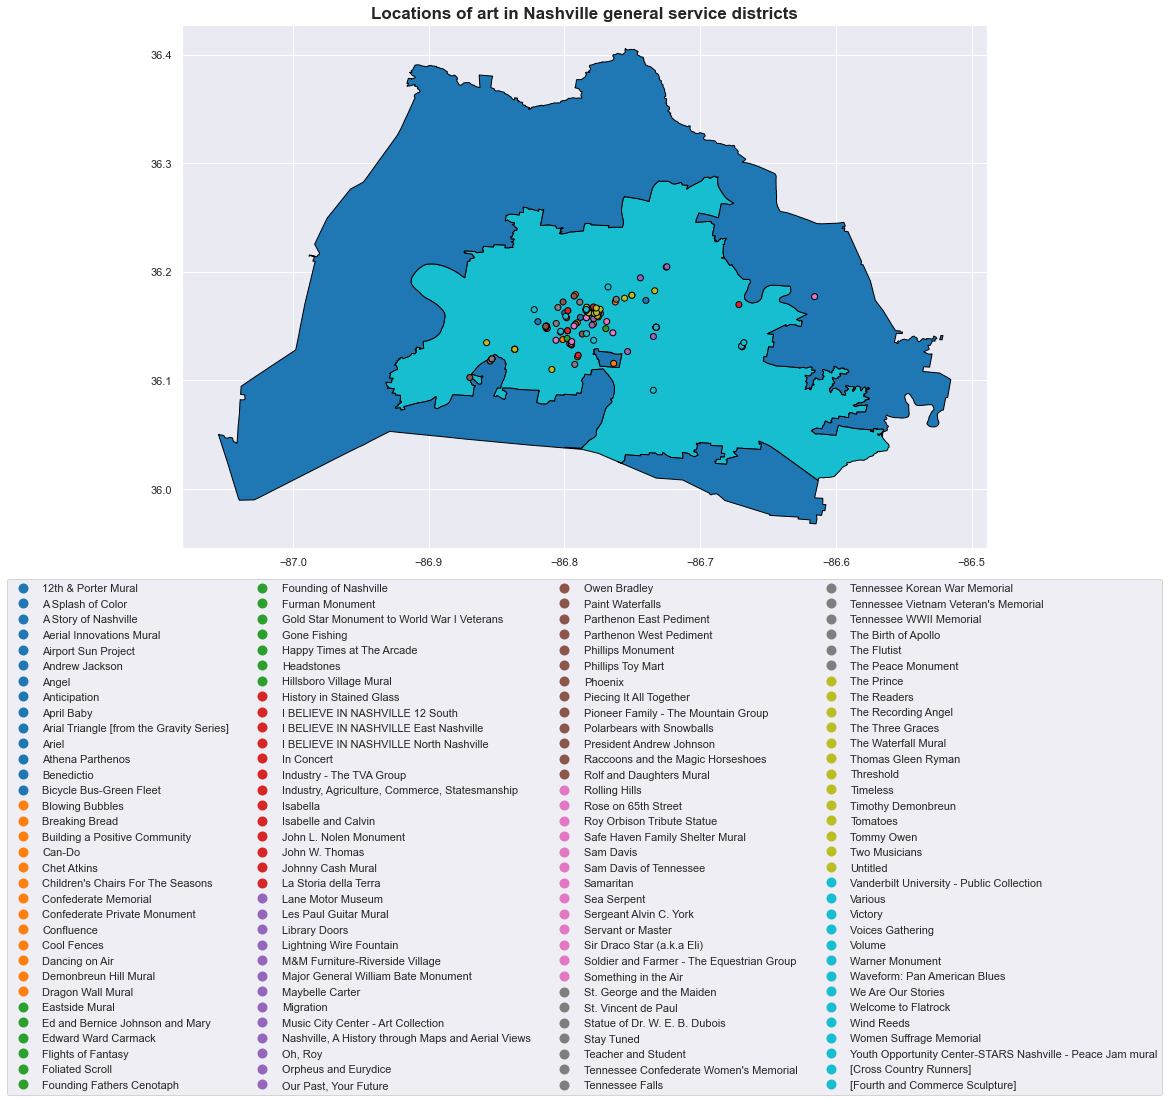

In [187]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 12))
plt.tight_layout()

nv_shape.plot(column='name', legend=True, ax=ax1, edgecolor='black',
              linewidth=1, legend_kwds={'loc':'upper right'}, aspect=0.8)

arty_gp.plot(column ='Title', legend=True, ax=ax1, edgecolor='black',
             linewidth=1, 
             legend_kwds={'loc':'upper center', 'bbox_to_anchor':(0.5, -0.05), 'ncol':4}, 
             aspect=0.8)

ax1.set_title('Locations of art in Nashville general service districts', fontsize=17,
              fontweight='bold')
plt.show()

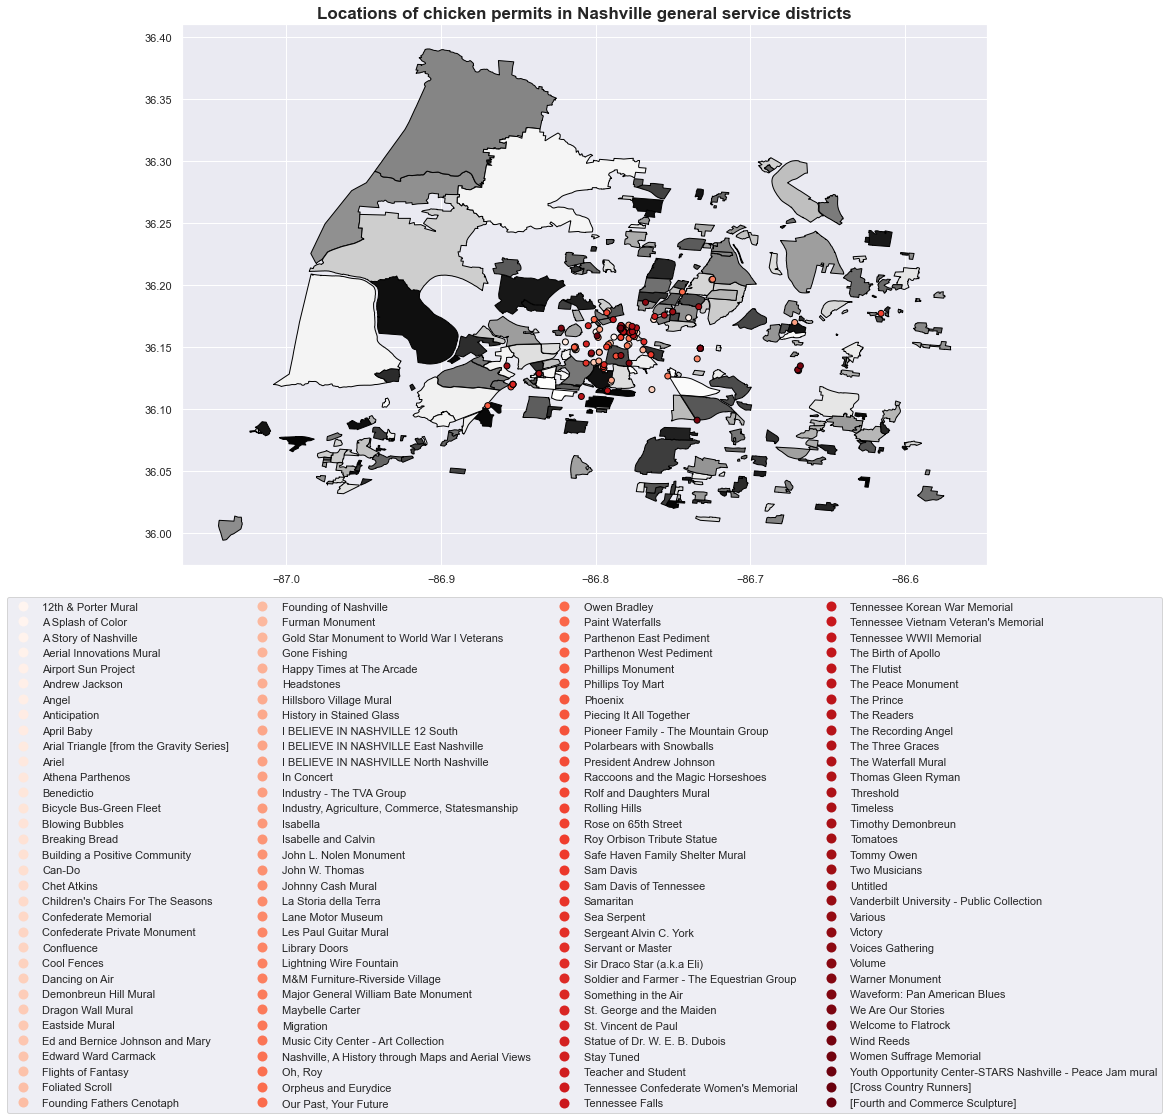

In [188]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 12))
plt.tight_layout()

nv.plot(column='name', legend=True, ax=ax1, edgecolor='black',
        linewidth=1, legend_kwds={'loc':'upper right'}, aspect=0.8,
         cmap='gist_gray')

arty_gp.plot(column ='Title', legend=True, ax=ax1, edgecolor='black',
             linewidth=1, 
             legend_kwds={'loc':'upper center', 'bbox_to_anchor':(0.5, -0.05), 'ncol':4}, 
             aspect=0.8, cmap='Reds')

ax1.set_title('Locations of chicken permits in Nashville general service districts', fontsize=17,
              fontweight='bold')
plt.show()

#### Geospatial join

In [189]:
art_within_neighbors = geop.sjoin(arty_gp, nv, op ='within')
print(type(art_within_neighbors))

<class 'geopandas.geodataframe.GeoDataFrame'>


print(art_within_neighbors.crs)
print(art_within_neighbors.shape)
print(arty_gp.shape)

art_within_neighbors.head(1)

Only 40 pieces of art are within neighbourhoods.

In [190]:
neighbor_12 = pd.Series(art_within_neighbors.name.unique().tolist())

In [191]:
art_within_neighbors.columns.tolist()
art_within_neighbors[['name', 'Title']].groupby('name').\
agg('count').sort_values(by='Title', ascending=False)

Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1

Most art is in the Urban Residents. Let's have a closer look into it.

In [192]:
urban_art = art_within_neighbors[art_within_neighbors.name=='Urban Residents']

print(type(urban_art))
print(urban_art.shape)
print(urban_art.columns.tolist())

<class 'geopandas.geodataframe.GeoDataFrame'>
(22, 13)
['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type', 'Description', 'Latitude', 'Longitude', 'Mapped Location', 'geometry', 'index_right', 'name']


In [193]:
urban_neighbors = nv.loc[nv.name=='Urban Residents']

print(urban_neighbors.shape)

(1, 2)


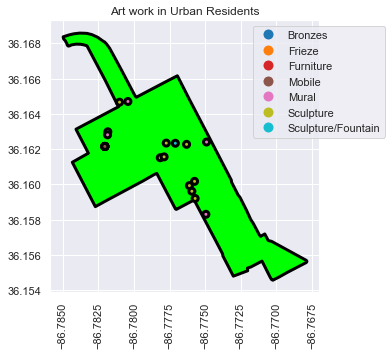

In [194]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

urban_neighbors.plot(edgecolor='black', linewidth=3, color='lime', ax=ax)
urban_art.plot(edgecolor='black', linewidth=3, ax=ax, column='Type', legend=True,
               legend_kwds={'ncol':1, 'bbox_to_anchor':(1, 1), 'loc':'upper center'}
               )

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.title('Art work in Urban Residents')
plt.show()

In [195]:
urban_neighbors = urban_neighbors.to_crs(3857)
print(urban_neighbors.crs)
urban_area_km_squared = urban_neighbors.geometry.area / (10**6)
urban_area_km_squared 

epsg:3857


41    1.12899
dtype: float64

#### Nashville Urban Center Residents district.

<p>
Creating a interactive Folium map.
</p> 


#### Add (district) border shape to the Folium map.

In [196]:
urban_neighbors

name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...

In [197]:
urban_center = urban_neighbors.geometry.centroid
print(type(urban_center))
print(urban_center.crs)

urban_center

<class 'geopandas.geoseries.GeoSeries'>
epsg:3857


41    POINT (-9660034.312 4322835.783)
dtype: geometry

In [198]:
# crs?
print(urban_center.crs)
urban_c566 = urban_center.to_crs(4326)
print(urban_c566.crs)

epsg:3857
epsg:4326


In [199]:
uc_geoc = [ urban_c566.y , urban_c566.x]
uc_geoc = [float(i) for i in uc_geoc]
uc_geoc 

[36.16127839416127, -86.77756467767182]

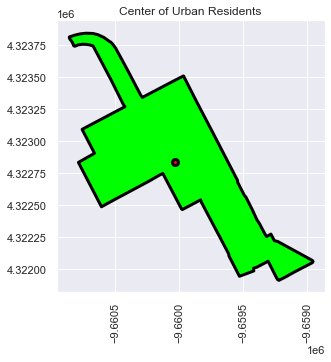

In [200]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

urban_neighbors.plot(edgecolor='black', linewidth=3, color='lime', ax=ax)
urban_center.plot(ax=ax, edgecolor='black', linewidth=3, cmap='gist_rainbow')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.title('Center of Urban Residents')
plt.show()

In [201]:
f = folium.Figure(width=400, height=300)

nv_urbanc_map = folium.Map(location=uc_geoc, zoom_start=14,
                           tiles="openstreetmap").add_to(f)
display(nv_urbanc_map)

In [202]:
ub_borders =   folium.GeoJson(urban_neighbors.geometry,
               style_function= \
               lambda x: {'fillColor': 'crimson',
                          "color": "#ff7800",
                          "weight": 5,
                          "opacity": 0.8,
                          "stroke":True}).add_to(nv_urbanc_map)

#### Add a pop up to the (district) border shape of the Folium map.

<p>
Pop up understands HTML.
</p> 

In [203]:
nv_descript = \
"""<strong>Nashville</strong> is the capital and most populous city of the U.S. state of Tennessee. 
The city is the county seat of Davidson County and is located on the Cumberland River.
It is the 23rd most-populous city in the United States.
<a href="https://en.wikipedia.org/wiki/Nashville,_Tennessee"
target="_blank"">Wikipedia</a>"""

folium.Popup(nv_descript ).add_to(ub_borders)

In [204]:
display(nv_urbanc_map)

Lockeland Springs district.

In [205]:
lock = nv.loc[nv.name == 'Lockeland Springs'].to_crs(3857)
print(lock)
print(lock.crs)

lock_art = art_within_neighbors.loc[art_within_neighbors.name == 'Lockeland Springs'].to_crs(3857)
print(lock_art[['Title', 'Medium', 'Location']])
print(lock_art.crs)

lock_center = nv.loc[nv.name=='Lockeland Springs'].to_crs(3857).geometry.centroid
print(lock_center)
print(type(lock_center))
print(lock_center.crs)

                 name                                           geometry
13  Lockeland Springs  MULTIPOLYGON (((-9655775.826 4325921.263, -965...
epsg:3857
                        Title               Medium            Location
5    Aerial Innovations Mural  House paint on wood  202 South 17th St.
30             Eastside Mural          Spray Paint    1008 Forrest Ave
118             Two Musicians          Spray Paint    1008 Forrest Ave
epsg:3857
13    POINT (-9656031.389 4325085.014)
dtype: geometry
<class 'geopandas.geoseries.GeoSeries'>
epsg:3857


In [206]:
lock_center_4326 = lock_center.to_crs(4326)
lock_y_long = lock_center_4326.geometry.y
lock_x_lat = lock_center_4326.geometry.x
lock_coords = [lock_y_long, lock_x_lat]
lock_coords = [float(i) for i in lock_coords]
print(lock_coords)

[36.17758954245013, -86.74160581098822]


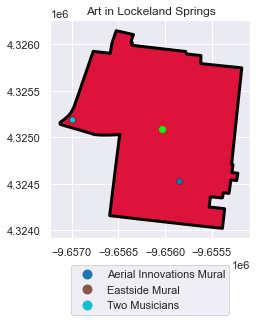

In [207]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

lock.plot(edgecolor='black', linewidth=3, color='crimson', ax=ax)
lock_art.plot(column='Title', ax=ax, linewidth=0.3, edgecolor='black', legend=True,
              legend_kwds={'ncol':1, 'bbox_to_anchor':(0.5, -0.1), 'loc':'upper center'})
lock_center.plot(ax=ax, color='lime')

plt.title('Art in Lockeland Springs')
plt.show()

In [208]:
# Add title - Thanks to: 
# https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map

loc = 'Shape of Lock in Folium map of Nashville'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

f = folium.Figure(width=600, height=300)

map_lock = folium.Map(location=lock_coords, zoom_start=14).add_to(f)
folium.GeoJson(lock.geometry).add_to(map_lock)

map_lock .get_root().html.add_child(folium.Element(title_html))

map_lock .save('lock.html')

display(map_lock)

<strong> Creating a interactive Folium map.</strong> 
<p>
Including, adding the urban district borders, a title and a pop up to the map.
</p> 

In [209]:
# print(urban_neighbors)
urban_center_4326 = urban_center.to_crs(4326)
print(urban_center_4326.crs)

urban_center_geocoord_list = [float(urban_center_4326.y), float(urban_center_4326.x)]
print(urban_center_geocoord_list)

title_urbc = 'Nashville centered around the center of the urban district within borders'

title_urbc_html = '''
                  <h2 align="center" style="font-size:14px" font-style="italic"><b>{}</b></h2>
           
                  '''.format(title_urbc)
# print(title_urbc_html)

f_nv_ubc = folium.Figure(width=600, height=300)

nv_urbcenter = folium.Map(location=urban_center_geocoord_list,
                          zoom_start=14, tiles='Stamen Terrain').add_to(f_nv_ubc)

# folium.GeoJson(lock.geometry).add_to(map_lock)
urbd_borders = folium.GeoJson(urban_neighbors.geometry,
               style_function= \
               lambda x: {'fillColor': 'limegreen',
                          "color": "plum",
                          "weight": 5,
                          "opacity": 0.8,
                          "stroke":True}).add_to(nv_urbcenter)

nv_urbcenter.get_root().html.add_child(folium.Element(title_urbc_html))
folium.Popup(nv_descript).add_to(urbd_borders)



epsg:4326
[36.16127839416127, -86.77756467767182]


In [210]:
display(nv_urbcenter)

<strong>Adding markers to the map.</strong>

<p>
Iterating over the rows of the df gets the markers.
</p> 

In [211]:
urban_art = urban_art.copy()
urban_art.iloc[0,0] = 'Fourth and Commerce Sculpture'

In [212]:
urban_art.iloc[0,0]

'Fourth and Commerce Sculpture'

In [213]:
# print(urban_art.head(1))
# print(urban_art.geometry.y)
# print(urban_art.columns)
# Getting the index number of the geometry column
# print(len(urban_art.geometry))

In [214]:
print(urban_art.isna().sum())

Title              0
Last Name          0
First Name         1
Location           0
Medium             2
Type               0
Description        4
Latitude           0
Longitude          0
Mapped Location    0
geometry           0
index_right        0
name               0
dtype: int64


The NA's could be a problem, when generating pop-ups.

In [215]:
urban_art = urban_art.fillna("")
print(urban_art.isna().sum())

Title              0
Last Name          0
First Name         0
Location           0
Medium             0
Type               0
Description        0
Latitude           0
Longitude          0
Mapped Location    0
geometry           0
index_right        0
name               0
dtype: int64


Also special signs like "'" could cause problems.

In [216]:
urban_art = urban_art.replace(to_replace="\'", value='`')

In [217]:
type(urban_art)

geopandas.geodataframe.GeoDataFrame

In [218]:
geo_index = urban_art.columns.get_loc('geometry')
geo_index_title = urban_art.columns.get_loc('Title')

Example: get the name-values of the pieces of art by iterating.

In [219]:
urban_art_pieces = []
for row in urban_art.iterrows():
    all_row_values = row[1]
    piece_of_art = all_row_values[0]
    urban_art_pieces.append(piece_of_art)
    
print(len(urban_art_pieces))
print(urban_art_pieces[:3])

22
['Fourth and Commerce Sculpture', 'A Story of Nashville', 'Chet Atkins']


In [220]:
title_urbc_html_2 = \
"""Art in the Nashville urban district marked on the map."""

title_urbc_html_2 = '''
                  <h2 align="center" style="font-size:14px" font-style="italic"><b>{}</b></h2>
           
                  '''.format(title_urbc_html_2)

nv_urbcenter_2 = folium.Map(location=urban_center_geocoord_list,
                            zoom_start=16, tiles='Stamen Terrain')

urbd_borders_2 = folium.GeoJson(urban_neighbors.geometry,
               style_function= \
               lambda x: {'fillColor': 'limegreen',
                          "color": "plum",
                          "weight": 5,
                          "opacity": 0.8,
                          "stroke":True}).add_to(nv_urbcenter_2)

nv_urbcenter_2.get_root().html.add_child(folium.Element(title_urbc_html_2))
folium.Popup(nv_descript).add_to(urbd_borders_2)

display(nv_urbcenter_2)

<p>
Folium Marker created an error, maybe because the text for the Popup is too long.<br>
The popup was not rendered.<br>
The solution is to adjust the popup frame for the text.<br>
Alternatively the font size maybe adjusted.<br>
Thanks to:<br>
<a href="https://stackoverflow.com/questions/62228489/python-folium-how-to-create-a-folium-map-marker-with-multiple-popup-text-line"
target="_blank">Stack</a> 
</p> 

In [221]:
urban_art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location', 'geometry',
       'index_right', 'name'],
      dtype='object')

In [222]:
for row in urban_art.iterrows():
    row_values = row[1]
    geocoords_uba = [row_values[geo_index].y, row_values[geo_index].x]
    
    title = \
    '<h3 align="center" style="font-size:12px" font-style="italic">' + row_values[0] + '</h3>'
    # print(row_values[0])
    
    iframe = folium.IFrame(title,
                       width=100,
                       height=60)

    popup = folium.Popup(iframe, max_width=100)

    marker_uba = folium.Marker(location = geocoords_uba,
                               popup=popup)
    marker_uba.add_to(nv_urbcenter_2 )

In [223]:
display(nv_urbcenter_2)

In [224]:
nv_urbcenter_23 = nv_urbcenter_2 


for row in urban_art.iterrows():
    row_values = row[1]
    geocoords_uba = [row_values[geo_index].y, row_values[geo_index].x]
    
    title_desc = '<strong align=center>' + row_values['Title'] + '</strong>'  + ': ' \
    + '<p style="font-size:12px">' + row_values['Description'] + '</p>'
    
    iframe = folium.IFrame(title_desc, width=300, height=100)
    
    popup = folium.Popup(iframe, max_width=300)
    
    # print(popup)
    
    folium.Marker(location=geocoords_uba, popup=popup, 
                  icon=folium.Icon(color="indigo")).add_to(nv_urbcenter_23)

In [225]:
display(nv_urbcenter_23)

## Choropleth 

A <b>choropleth</b> map is: 
</p> 
<p>
"A choropleth map (from Greek χῶρος choros 'area/region' and πλῆθος plethos 'multitude') is a type of thematic map in which a set of pre-defined areas is colored or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income." (Wikipedia)
</p> 


In [226]:
sd_gp.columns.to_list()

['School ID',
 'School Name',
 'Street Address',
 'City',
 'State',
 'ZIP Code',
 'Phone Number',
 'School State ID',
 'School Level',
 'Lowest Grade',
 'Highest Grade',
 'Latitude',
 'Longitude',
 'School Website',
 'Cluster',
 'Mapped Location',
 'geometry']

In [227]:
schools_in_districts = sd_gp[['geometry', 'School Name', 'Latitude', 'Longitude']]

In [228]:
schools_in_districts.head(2)

geometry              School Name   Latitude  Longitude
0  POINT (-86.65885 36.02182)  A. Z. Kelley Elementary  36.021817 -86.658848
1  POINT (-86.83223 36.25296)    Alex Green Elementary  36.252961 -86.832229

In [229]:
print(sdist.crs)
print(sdist.geometry.crs)

epsg:4326
epsg:4326


In [230]:
sdist.head(1)

first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...

In [231]:
type(sd_gp)

geopandas.geodataframe.GeoDataFrame

In [232]:
sd_gp.head(1)

School ID              School Name    Street Address     City State  \
0        496  A. Z. Kelley Elementary  5834 Pettus Road  Antioch    TN   

   ZIP Code   Phone Number  School State ID       School Level Lowest Grade  \
0     37013  (615)941-7535                1  Elementary School     Grade P3   

  Highest Grade   Latitude  Longitude  \
0       Grade 4  36.021817 -86.658848   

                                      School Website     Cluster  \
0  http://schools.mnps.org/az-kelley-elementary-s...  Cane Ridge   

               Mapped Location                    geometry  
0  (36.02181712, -86.65884778)  POINT (-86.65885 36.02182)

In [233]:
# schools_in_districts = gpd.sjoin(school_districts, schools_geo, op = 'contains')
schools_in_districts = geop.sjoin(sdist, sd_gp , op = 'contains')

In [234]:
schools_in_districts.head(1)

first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district  ...   Phone Number  \
0    Gentry  6108 Beals Lane   Member       2016        1  ...  (615)921-8440   

  School State ID  School Level  Lowest Grade Highest Grade   Latitude  \
0            8008       Charter       Grade 5       Grade 8  36.162306   

   Longitude                          School Website  Cluster  \
0 -86.855332  http://www.republiccharterschools.org/      NaN   

               Mapped Location  
0  (36.16230587, -86.85533179)  

[1 rows x 29 columns]

In [235]:
schools_in_districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 170 entries, 0 to 8
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   first_name       170 non-null    object  
 1   city             170 non-null    object  
 2   zip              170 non-null    object  
 3   email            170 non-null    object  
 4   state            170 non-null    object  
 5   last_name        170 non-null    object  
 6   address          170 non-null    object  
 7   position         170 non-null    object  
 8   term_expir       170 non-null    object  
 9   district         170 non-null    object  
 10  phone            170 non-null    object  
 11  geometry         170 non-null    geometry
 12  index_right      170 non-null    int64   
 13  School ID        170 non-null    int64   
 14  School Name      170 non-null    object  
 15  Street Address   170 non-null    object  
 16  City             170 non-null    objec

In [236]:
schools_in_districts_2 = \
schools_in_districts.loc[:, ['district', 'School ID', 'School Name', 'city',
                             'geometry', 'Latitude', 'Longitude']]

In [237]:
schools_in_districts_2.rename(columns=
                              {'School ID': 'school_id', 'School Name': 'name'}, 
                               inplace=True)

schools_in_districts_2.head(2)

district  school_id                                name       city  \
0        1        594                      Nashville Prep  Nashville   
0        1        669  Rocketship Partners Community Prep  Nashville   

                                            geometry   Latitude  Longitude  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  36.162306 -86.855332  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  36.174962 -86.799248

In [238]:
schools_in_districts_2_3857 = schools_in_districts_2.to_crs('EPSG:3857')
print(schools_in_districts_2_3857.crs)
schools_in_districts_2_3857.head(2)

EPSG:3857


district  school_id                                name       city  \
0        1        594                      Nashville Prep  Nashville   
0        1        669  Rocketship Partners Community Prep  Nashville   

                                            geometry   Latitude  Longitude  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  36.162306 -86.855332  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  36.174962 -86.799248

In [239]:
schools_in_districts_2.district.unique()

array(['1', '3', '2', '4', '9', '8', '5', '6', '7'], dtype=object)

In [240]:
schools_in_districts_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [241]:
schools_in_districts_3857 = schools_in_districts_2.to_crs(epsg=3857)
print(schools_in_districts_3857.crs)
schools_in_districts_3857.head(1)

epsg:3857


district  school_id            name       city  \
0        1        594  Nashville Prep  Nashville   

                                            geometry   Latitude  Longitude  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  36.162306 -86.855332

#### Calculating the are metric in km^2

In [242]:
# define a variable for m^2 to km^2
sqm_to_sqkm = 10**6

In [243]:
schools_in_districts_3857['area'] = \
round(schools_in_districts_3857.geometry.area / sqm_to_sqkm, 2)

schools_in_districts_3857.head(1)

district  school_id            name       city  \
0        1        594  Nashville Prep  Nashville   

                                            geometry   Latitude  Longitude  \
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  36.162306 -86.855332   

     area  
0  563.13

In [244]:
schools_in_districts_4326 = schools_in_districts_3857.to_crs(epsg=4326)
schools_in_districts_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

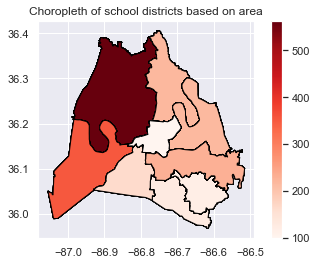

In [245]:
schools_in_districts_4326.plot(column = 'area', cmap = 'Reds', edgecolor = 'black',
                               legend=True)
plt.title("Choropleth of school districts based on area")
plt.show()

In [246]:
schools_counts = schools_in_districts_4326.groupby(['district']).size()

print(type(schools_counts))
schools_counts

<class 'pandas.core.series.Series'>


district
1    30
2    11
3    19
4    18
5    36
6    21
7    13
8    10
9    12
dtype: int64

In [247]:
schools_counts_df = schools_counts.to_frame().reset_index(level=0)
schools_counts_df.columns = ['district', 'school_counts']
schools_counts_df.head(2)

district  school_counts
0        1             30
1        2             11

In [248]:
# districts with schools counted
district_school_counts = sdist.merge(schools_counts_df, on='district')
district_school_counts[['last_name', 'district', 'school_counts']].head()

last_name district  school_counts
0    Gentry        1             30
1  Speering        3             19
2   Brannon        2             11
3  Shepherd        4             18
4    Frogge        9             12

In [249]:
print(type(district_school_counts))
print(np.shape(district_school_counts))

<class 'geopandas.geodataframe.GeoDataFrame'>
(9, 13)


In [250]:
district_school_counts.dtypes

first_name         object
city               object
zip                object
email              object
state              object
last_name          object
address            object
position           object
term_expir         object
district           object
phone              object
geometry         geometry
school_counts       int64
dtype: object

In [251]:
print(type(district_school_counts.geometry[1]))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [252]:
district_school_counts_json = district_school_counts.to_json()
district_school_counts_json[:700]

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"address": "6108 Beals Lane", "city": "Nashville", "district": "1", "email": "gentryfordistrict1@comcast.net", "first_name": "Dr. Sharon", "last_name": "Gentry", "phone": "615-268-5269", "position": "Member", "school_counts": 30, "state": "TN", "term_expir": "2016", "zip": "37218"}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[-86.77136400034288, 36.38356699971902], [-86.77134100031962, 36.38342900001451], [-86.77119900020405, 36.3833800001776], [-86.77108800026653, 36.38327399984004], [-86.77090400021756, 36.38312799981859], [-86.77064599977848, 36.38298500014298], [-86.7701839997801, 36.3828'

In [253]:
district_school_counts.to_file("district_school_counts_gejson.geojson", driver='GeoJSON')

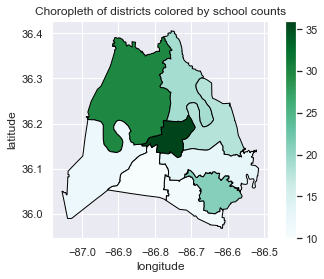

In [254]:
district_school_counts.plot(column='school_counts', cmap='BuGn', edgecolor='black',
                            legend=True)
plt.title("Choropleth of districts colored by school counts")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [255]:
district_school_counts['density'] = \
district_school_counts.apply(lambda row: row.school_counts / row.geometry.area, axis=1)

In [256]:
print(district_school_counts.columns.to_list())

['first_name', 'city', 'zip', 'email', 'state', 'last_name', 'address', 'position', 'term_expir', 'district', 'phone', 'geometry', 'school_counts', 'density']


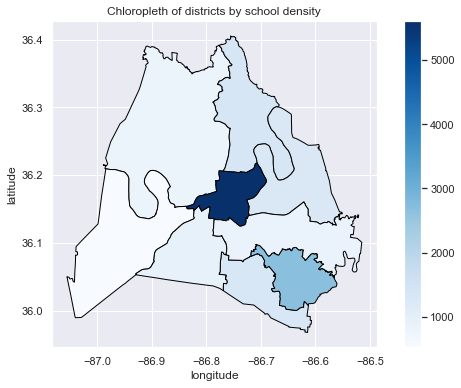

In [257]:
district_school_counts.plot(column='density', cmap='Blues', edgecolor='black', linewidth=1, 
                            legend=True,  figsize=(10,6))

plt.title("Chloropleth of districts by school density")
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

In [258]:
print(district_school_counts.crs)
print(district_school_counts.geometry.crs)

epsg:4326
epsg:4326


In [259]:
title_2222 = \
"""Number of schools in school district."""

title_2222 = \
''' <h2 align="center" style="font-size:14px" font-style="italic"><b>{}</b></h2>'''.format(title_2222)


f = folium.Figure(width=600, height=300)

nashville = [36.1636,-86.7823]
m = folium.Map(location=nashville, zoom_start=10).add_to(f)

m.choropleth(
geo_data=district_school_counts,
name='Choropleth',
data=district_school_counts,
columns=['district', 'density'],
key_on='feature.properties.district',
fill_color='Set1',
fill_opacity=0.75,
line_opacity=0.5,
legend_name='Schools per km squared by School District'
)

m.get_root().html.add_child(folium.Element(title_2222))

# Add layer control and display
folium.LayerControl().add_to(m)
display(m)

### Adding markers 

In [260]:
district_school_counts_3857 = district_school_counts.to_crs(epsg=3857)

district_school_counts_3857['center'] = district_school_counts_3857.geometry.centroid

print(district_school_counts_3857.crs)
district_school_counts.head(1)

epsg:3857


first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  school_counts  \
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...             30   

      density  
0  818.745403

In [261]:
district_school_counts['center'] = district_school_counts_3857.center.to_crs(epsg = 4326)

In [262]:
district_school_counts = district_school_counts_3857.to_crs(epsg = 4326)
district_school_counts['center'] = district_school_counts_3857.center.to_crs(epsg = 4326)

print(district_school_counts.geometry.crs)
print(district_school_counts.center.crs)
district_school_counts.head(1)

epsg:4326
epsg:4326


first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  school_counts  \
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...             30   

      density                      center  
0  818.745403  POINT (-86.86086 36.26289)

In [263]:
for row in district_school_counts.iterrows():
    iii = row[1]
    centerpoint = iii['center']
    l = [centerpoint.y , centerpoint.x]
    p = ('District: ' + str(iii['district'] + ' - Number of schools: ' + str(iii['school_counts'])))
    marker = folium.Marker(location = l , popup = p)
    marker.add_to(m)
    
display(m)